# XGBOOST 

## Czym jest wzmacnianie i wzmocnienie gradientowe ? 

### Boosting

Boosting to po prostu metoda wykorzystująca zasadę uczenia zespołowego (ensemble learning), ale w kolejności sekwencyjnej.

Ensemble learning jest to proces, który łączy decyzje z wielu bazowych modeli. Metody uczenia zespołowego dobierają losową próbę ze zwracaniem na której odbywa się uczenie prostych algorytmów. 

W przypadku Boostingu, obserwacje otrzymują wagi i niektóre pojawiają się w nowym datasecie częściej. Również w Boostingu każdy następny prosty model jest uczony w sposób sekwencyjny. To znaczy, że następny bierze pod uwagę sukces poprzedniego klasyfikatora. W każdym kolejnym kroku uczenia Boostingu, wagi są na nowo redystrybuowane. Źle przewidziane wektory obserwacji mają zwiększone wagi, w celu zwiększania nakładów na rozwiązanie tych najtrudniejszych przypadków. Każdy następny prosty klasyfikator będzie musiał radzić sobie z przewidywaniem tych cięższych przypadków, co widać to na poniższym obrazku:
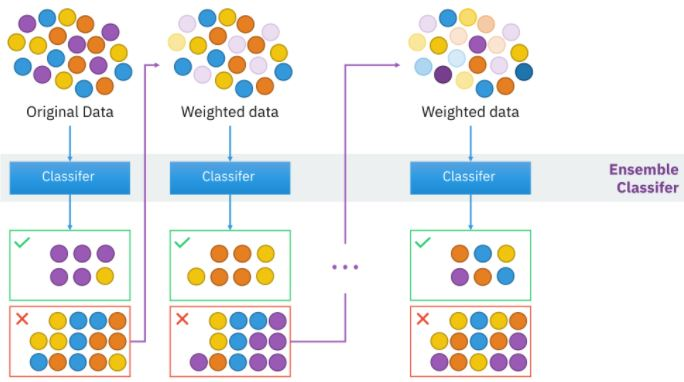
W Boostingu brana pod uwagę jest średnia ważona z głosów każdego prostego algorytmu. Wynika to z tego, że na etapie uczenia, również nakładane są wagi na każdy algorytm – te które osiągają lepsze wyniki klasyfikacji otrzymują wyższe wagi. Niektóre algorytmy Boostingu stawiają warunki do tego czy brać pod uwagę prosty klasyfikatora np. jeżeli nie osiągnął on co najmniej 50% dokładności predykcji na próbce nie będzie on brany pod uwagę w predykcji na oryginalnym datasecie. Istnieje szereg algorytmów boostingu, gdzie każdy działa w trochę inny sposób z pewnością pojawią się artykułu omawiające każdy z osobna.

Boosting to rodzaj uczenia się zespołowego, który wykorzystuje wynik poprzedniego modelu jako dane wejściowe do następnego. Zamiast osobno trenować modele, zwiększać modele sekwencyjnie, przy czym każdy nowy model jest szkolony w zakresie korygowania błędów poprzednich. W każdej iteracji (rundzie) poprawnie przewidzianym wynikom przypisuje się mniejszą wagę, a błędnie przewidziano wyższą. Następnie wykorzystuje średnią ważoną, aby uzyskać ostateczny wynik.
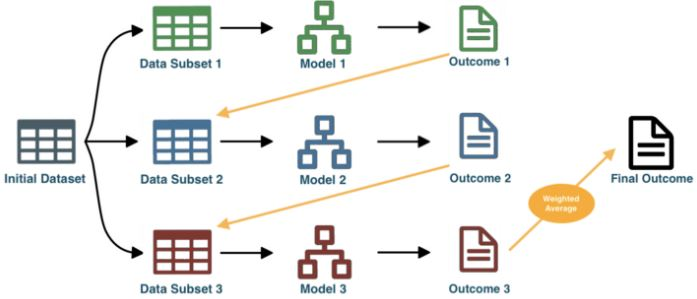

Bardziej matematycznie można byłoby to podsumować, że po każdym przebiegu próbujemy dopasować nasz predyktor do błędu resztkowego popełnionego przez poprzedni predyktor.

### Gradient Boosting

Nazwa wzmocnienie gradientowe pochodzi od sformułowania „Gradient Boosting”.

Gradientem jest pole wektorowe wskazujące kierunki najszybszych wzrostów wartości danego pola skalarnego. W naszym przypadku gradient będzie wykorzystywany do wskazywania kierunku, w którym nasz model ma się poprawiać. 

Boosting to tak zwane przyśpieszenie. Polega na tym, że w każdym kolejnym kroku chcemy poprawić wcześniejsze błędy.
W pierwszym kroku budujemy proste drzewo decyzyjne. Następnie, mając informacje o działaniu tego drzewa, budujemy kolejne drzewko, które próbuje naprawić błąd tego wcześniejszego. I tak dalej. Uruchamiamy kolejne iteracje działające w taki sam sposób, tzn. próbując naprawiać wszystkie wcześniejsze decyzje. A korzystając z gradientu wiemy, w którym kierunku należy to robić. To jest idea przyśpieszonego uczenia.

Gradient Boosting to metoda zwiększająca, w której błędy są minimalizowane za pomocą algorytmu gradientowego . Mówiąc najprościej, zejście gradientowe to iteracyjny algorytm optymalizacji używany do minimalizowania funkcji strat.

Funkcja straty określa ilościowo, jak daleko nasze przewidywania są od rzeczywistego wyniku dla danego punktu danych. Im lepsze prognozy, tym niższy będzie wynik funkcji straty.

Kiedy konstruujemy nasz model, celem jest zminimalizowanie funkcji strat we wszystkich punktach danych. Na przykład błąd średniokwadratowy (MSE) jest najczęściej używaną funkcją straty do regresji.

W przeciwieństwie do klasycznego Boosting, Gradient Boosting nie tylko zwiększa wagę źle przewidywanych wyników, ale także dostosowuje te wagi na podstawie gradientu - wynikającego z kierunku funkcji straty, w którym strata „maleje najszybciej”. 

Metoda ta wykorzystuje wiele prostych algorytmów typu drzewo decyzyjne, aby zredukować zarówno bias i wariancje modelu.

##### Schemat działania 

Krok 0 – tutaj mamy przedstawiony nasz zbiór uczący. Poniższe wartości (kropki) będziemy starali się przewidywać.
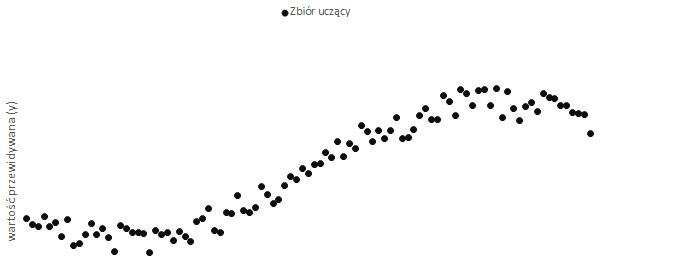

Krok I – budujemy pierwsze proste drzewo decyzyjne. Prognozę drzewa nanosimy na wykres zieloną kreską.
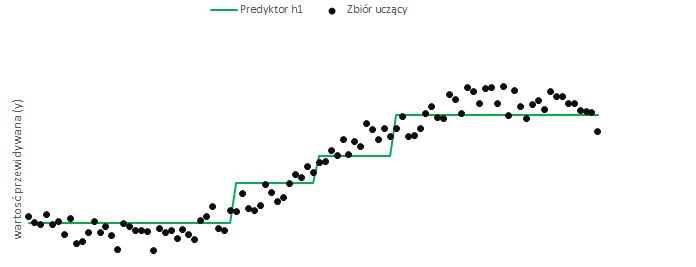

Krok II – naprawiamy błędy wcześniejszego drzewa, czyli wyliczamy reszty i dla nich budujemy kolejne drzewo. Reszty wyliczamy poprzez odjęcie od wartości rzeczywistej wartości przewidywanej.
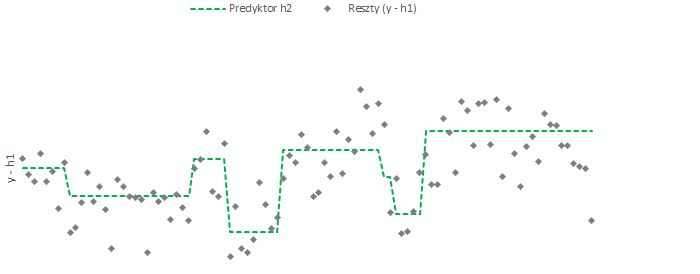

Teraz możemy zobaczyć jak nasz predyktor (suma predyktorów h1 i h2) po dwóch krokach się polepszył:
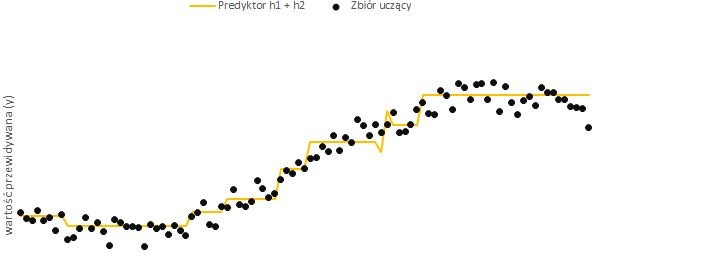
Widać, że w coraz lepiej odwzorowuje wartość do przewidywania, mimo, że były dopiero dwa kroki. Potwórzmy ten cykl jeszcze raz

Krok III – naprawiamy błędy wcześniejszych dwóch drzew. Poniżej wykres reszt oraz kolejny predyktor:
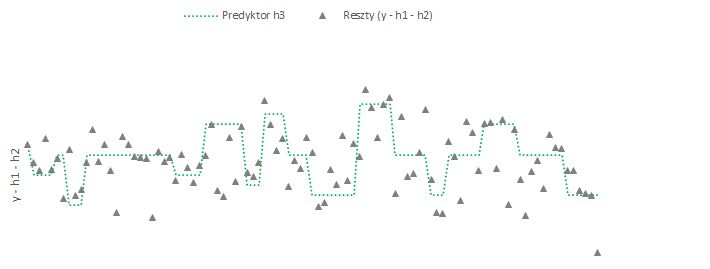

Teraz możemy zobaczyć jak nasz predyktor (suma predultora h1, h2 i h3) po trzech krokach się polepszył:
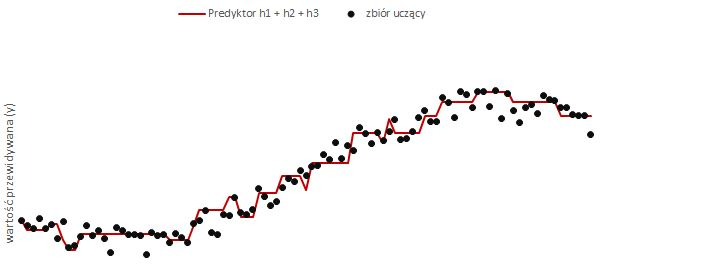

Porównajmy jeszcze kolejne predyktory, aby zobaczyć jak się w tym konkretnym przykładzie dopasowywał:
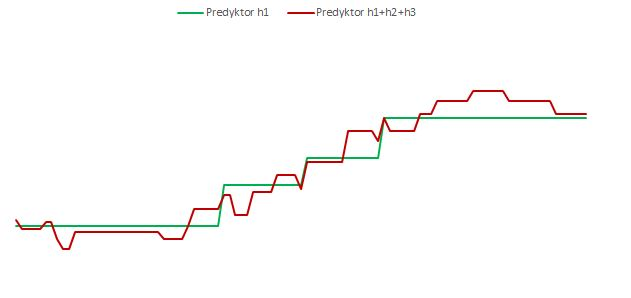

##### Gradient Boosting - regresja (opisowo)

GB uczy drzewa decyzyjne, które zazwyczaj są bardziej rozbudowane w tym algorytmie niż sam korzeń (przeważnie wybiera się od 8 do 32 liści). Podobnie jak inne algorytmy boostingu, następne budowane drzewo jest oparte na błędach predykcji poprzedniego oraz nadawana jest mu waga. Waga ta jednak jest stała dla wszystkich drzew. Takie drzewa są budowane aż do osiągniecia warunków stopu, czyli albo skończy się liczba wskazanych do stworzenia przez nas drzew, albo kolejne drzewa nie zwiększą jakości dopasowania do danych.

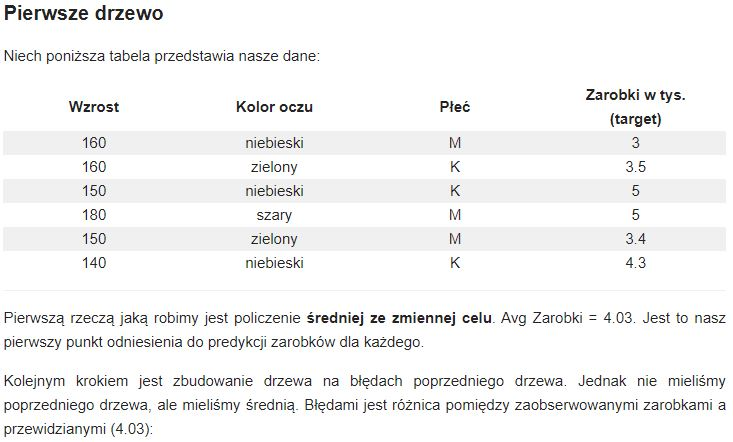

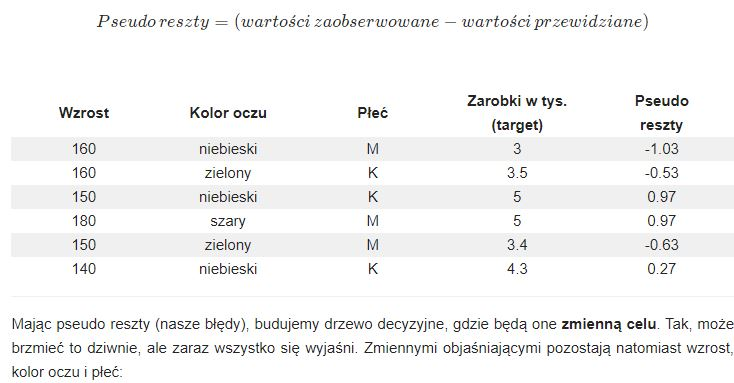

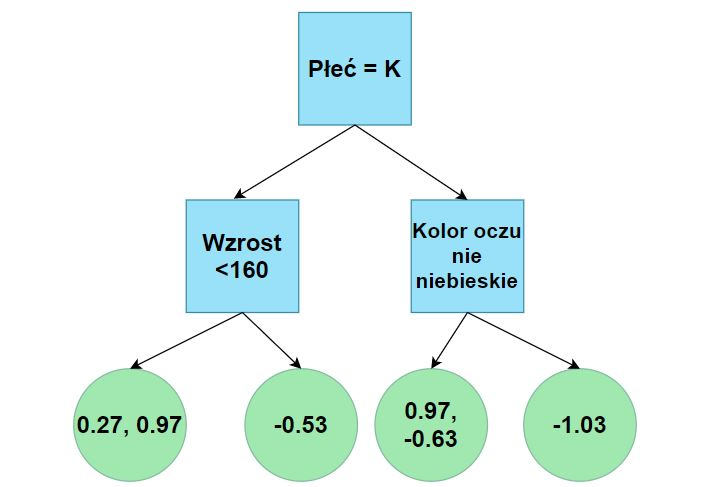

W naszym przykładzie mamy tylko 4 liście,  zwykle używa się od 8 do 32. Jak widać mamy mniej liści niż reszt w tabeli. W dwóch przypadkach, 2 wiersze danych idą do tego samego liścia, a więc te liście (od lewej – pierwszy i trzeci), zostają uzupełnione średnią z wartości w liściu:

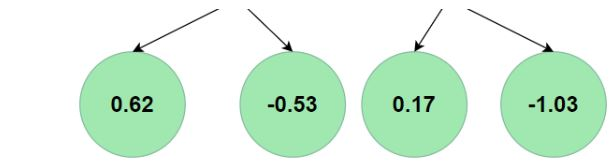

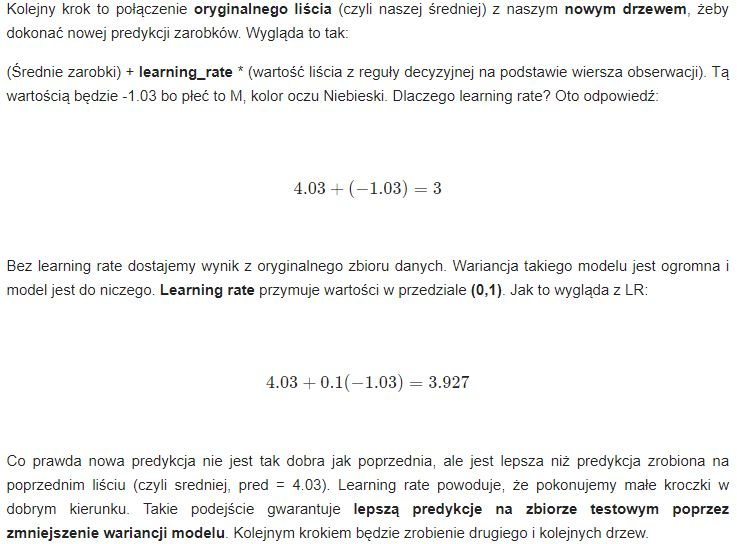

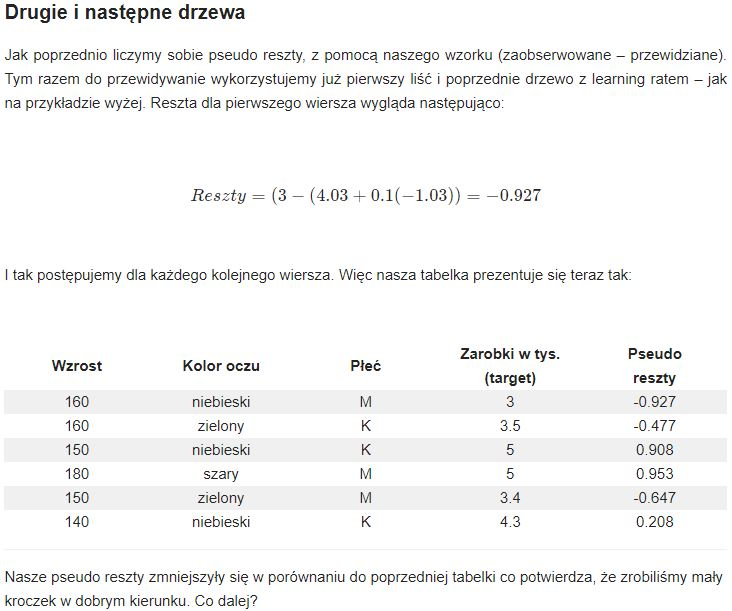

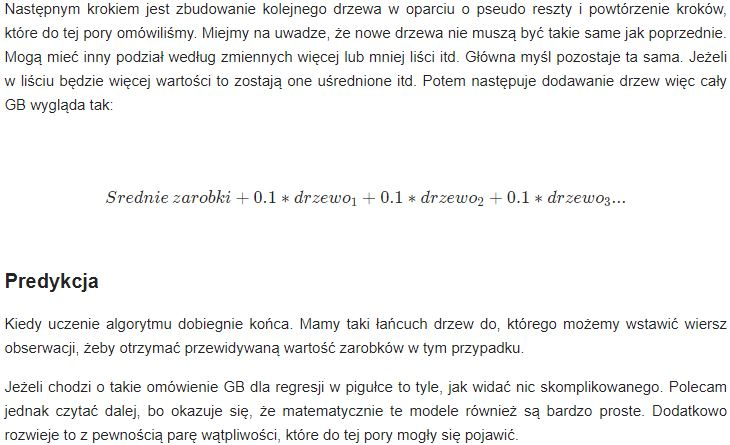

##### Gradient Boosting - regresja (matematycznie)

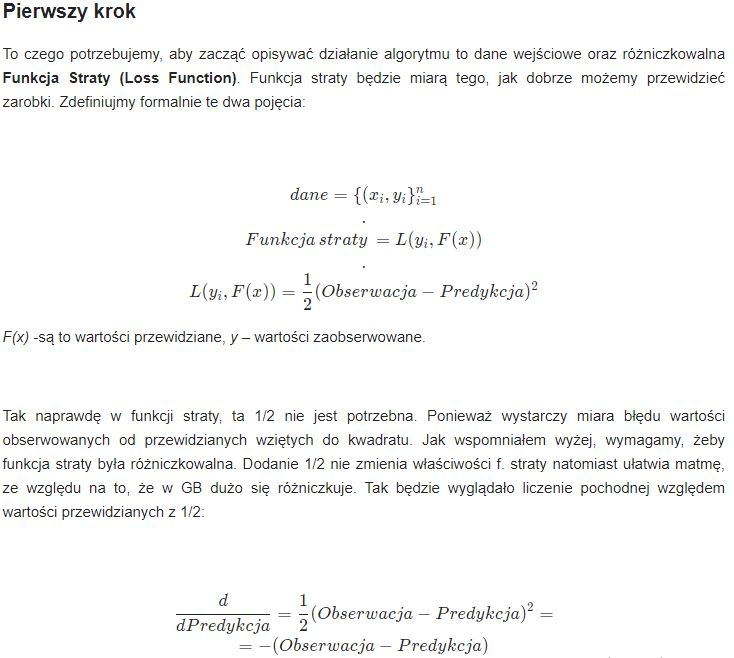

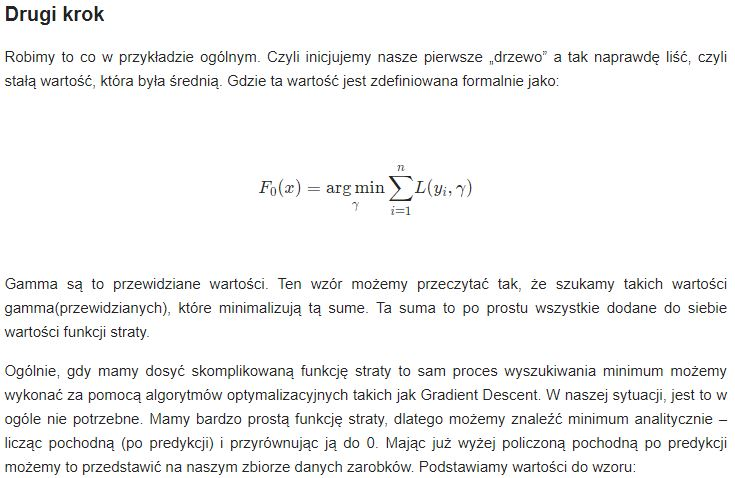

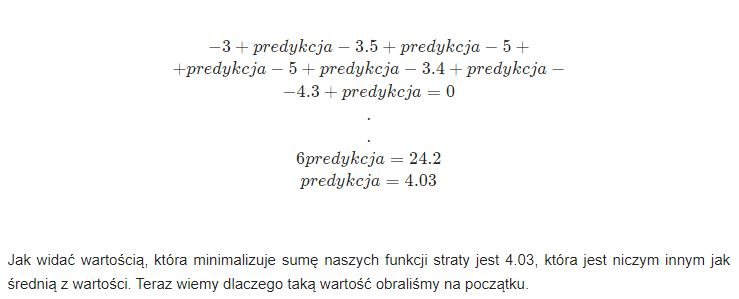

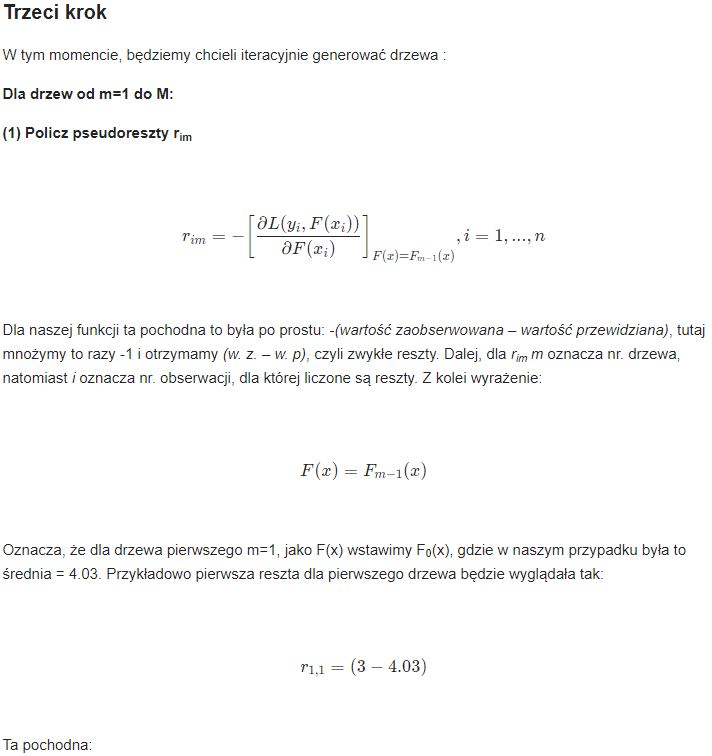

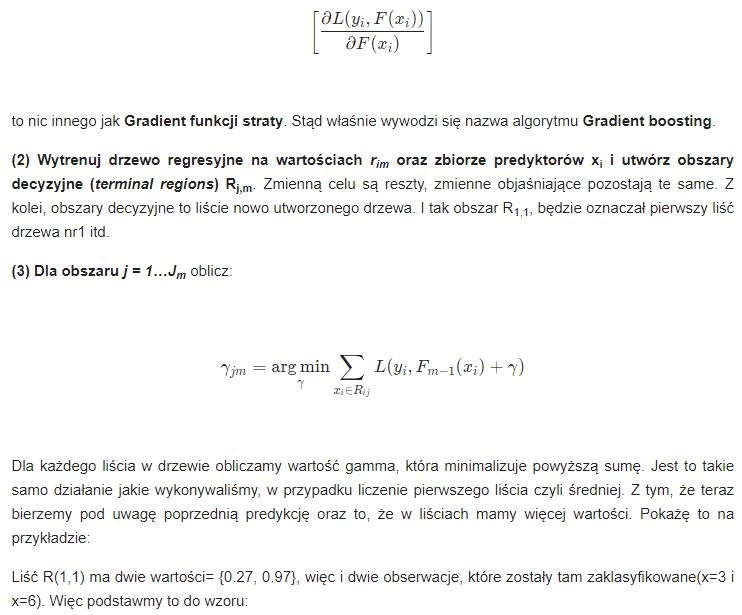

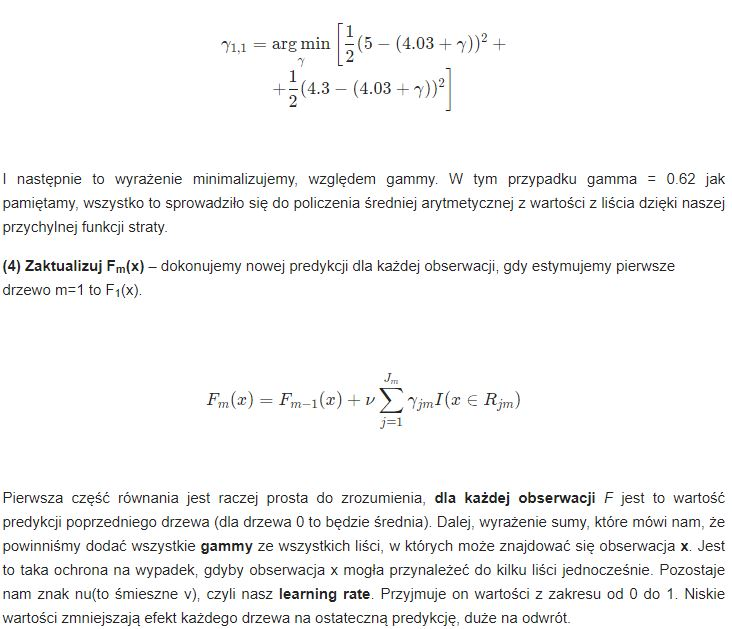

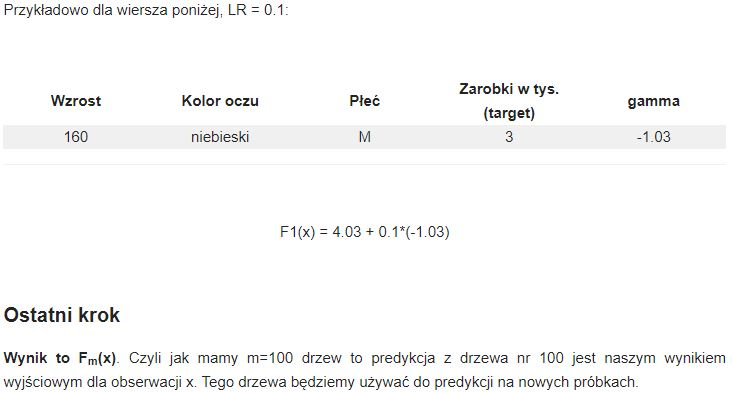

##### Rodzaje implementacji 

Wzmocnienie gradientowe pierwszy raz zostało zaprezentowane w Arcing the Edge w 1997, natomiast w ostatnim dziesięcioleciu zostało udoskonalone. Istnieje wiele różnych rodzajów implementacji.

* XGBoost – algorytm napisany przez Tianqi Chen: https://arxiv.org/pdf/1603.02754.pdf
* LightGBM – algorytm Microsoftu: https://lightgbm.readthedocs.io
* Catboost – algorytm rosyjskiej firmy Yandex: https://catboost.ai/

Uwaga: Wybierając którąkolwiek z pierwszych dwóch metod zazwyczaj otrzymuje się bardzo zbliżone wyniki, co zostanie pokazane w przykładach.

##### Xgboost - charakterystyka 

* XGBoost to raczej biblioteka typu open source, która „podkręca” wydajność innych algorytmów. Optymalizuje wydajność algorytmów, głównie drzew decyzyjnych, w ramach zwiększania gradientu, jednocześnie minimalizując nadmierne dopasowanie/obciążenie poprzez regularyzację
* zapewnia doskonałą wydajność w regresji i klasyfikacji
* jest elastyczny, tzn.  może wykonywać zadania uczenia maszynowego, takie jak regresja, klasyfikacja, ranking i inne cele zdefiniowane przez użytkownika
* ma wbudowaną walidację krzyżową
* trenowanie XGBoost jest stosunkowo proste, ale najtrudniejszą częścią jest optymalne dostrajanie parametrów
* rewolucjonizuje dziedzinę nauki o danych i uczenia maszynowego
* jest stosowany we wszystkich gałęziach przemysłu

##### Xgboost - przykłady zastosowań 

Wpływ tego algorytmu został powszechnie uznawany w wielu wyzwaniach związanych z uczeniem maszynowym.

Przykładami problemów, w których rozwiązaniach stosuje się Xgboost są np.: 
* przewidywanie sprzedaży w sklepach, 
* klasyfikacja tekstów internetowych, 
* przewidywanie zachowań klientów, 
* przewidywanie współczynnika klikalności reklam, 
* klasyfikacja złośliwego oprogramowania,
* kategoryzacja produktów, 
* przewidywanie ryzyka zagrożeń.

Jest to również zwycięski algorytm w wielu konkursach uczenia maszynowego. W rzeczywistości XGBoost został wykorzystany w 17 z 29 konkursów nauki danych na platformie Kaggle. Nie tylko w biznesie i konkursach XGBoost był używany w eksperymentach naukowych, takich jak Wielki Zderzacz Hadronów (wyzwanie uczące maszynowego Bozonu Higgsa ).

##### LightGBM - krótkie przedstawienie

LightGBM to mechanizm gradient boosting wykorzystujący algorytmy uczenia oparte na drzewach. Został on zaprojektowany jako bardzo wydajny, a jego zalety są następujące:
* Większa szybkość szkolenia i wyższa (choć w stosunku do Xgboost bardzo zbliżona) wydajność
* Mniejsze zużycie pamięci
* Lepsza dokładność
* Zdolność do obsługi danych o dużej skali

To właśnie szybkość szkolenia jest największą przewagą LightGBM nad Xgboost, zwłaszcza w przypadku wykonywania na dużych zbiorach danych w ograniczonym czasie.

W przeciwieństwie do poziomego (horyzontalnego) wzrostu w XGBoost, LightGBM dokonuje wzrostu w pionie (liście), co skutkuje większą redukcją strat i wyższą dokładnością, a jednocześnie jest szybsze. Może to jednak prowadzić do nadmiernego dopasowania danych treningowych, co można rozwiązać za pomocą parametru max-depth, określającego miejsce podziału. W związku z tym XGBoost jest w stanie tworzyć bardziej odporne modele niż LightGBM.

### Hiperparametry 

##### Hiperparametry vs parametry 

Każdy model w uczeniu maszynowym ma parametry. Jedne mają ich więcej, drugie mniej. 

Jeśli parametr wyliczany jest samodzielnie przez algorytm podczas uczenia, nazywamy go po prostu parametrem. Przykładem mogą być wagi w sieciach neuronowych. 

Natomiast jeśli parametr podawany jest przez użytkownika, który używa algorytmu, wówczas nazywamy go hiperparametrem (np. liczba drzew i iteracji w lesie losowym). 

Dobór hiperparametrów może mieć znaczący wpływ na jość modelu, ponieważ w każdym przypadku o optymalizacji dostaniecie lepszy wynik niż na wartościach domyślnych. W przypadku algorytmów drzewiastych za najważniejsze hiperparametry uznaje się m.in.: liczbę iteracji, głębokość drzewa i szybkość uczenia.

##### Podziały hiperparametrów 

W XGBoost istnieje wiele różnych parametrów i są one ogólnie podzielone na 3 typy :
* Parametry ogólne
* Parametry wzmacniacza
* Parametry zadania
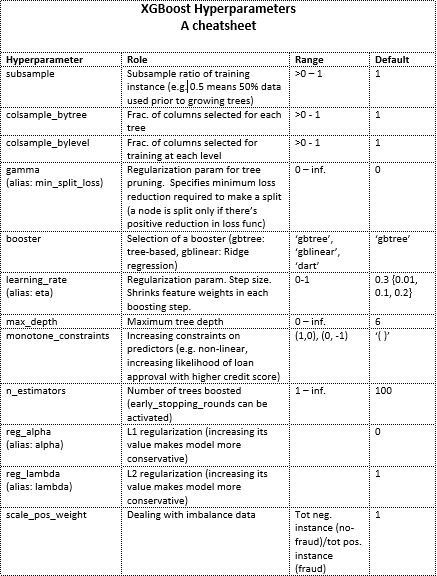

Poniżej znajdują się niektóre parametry, które są często dostosowywane w wyszukiwaniu siatki, aby znaleźć optymalną równowagę:
* n_estimators -> określa liczbę drzew decyzyjnych do wzmocnienia. Jeśli n_estymator = 1, oznacza to, że generowane jest tylko 1 drzewo, a zatem nie działa wzmocnienie. Domyślna wartość to 100, ale możesz grać z tą liczbą, aby uzyskać optymalną wydajność. Wartość musi być liczbą całkowitą większą niż 0. Wartość domyślna to 100.
* subsample -> reprezentuje stosunek podpróbki próbki uczącej. Podpróbka = 0,5 oznacza, że ​​50% danych uczących jest wykorzystywanych przed wyhodowaniem drzewa. Wartość może być dowolnym ułamkiem. Wartość musi mieścić się w przedziale od 0 do 1. Wartość domyślna to 1
* max_depth -> ogranicza głębokość wzrostu każdego drzewa. Domyślna wartość to 6, ale możesz wypróbować inne wartości, jeśli w Twoim modelu problemem jest nadmierne dopasowanie. Głębsze drzewo może zwiększyć wydajność, ale także zwiększyć złożoność i szanse na przesadzenie. Wartość musi być liczbą całkowitą większą niż 0. Wartość domyślna to 6.
* learning_rate ( alias: eta) -> jest to parametr regularyzacji, który zmniejsza wagi funkcji w każdym kroku zwiększania. Domyślna wartość to 0,3, ale ludzie zazwyczaj dostrajają się za pomocą wartości takich jak 0,01, 0,1, 0,2 itd. Współczynnik uczenia się określa wielkość kroku w każdej iteracji, podczas gdy model optymalizuje się pod kątem celu. Niski współczynnik uczenia się spowalnia obliczenia i wymaga większej liczby rund, aby osiągnąć taką samą redukcję błędu resztowego, jak w przypadku modelu o wysokim współczynniku uczenia się. Ale optymalizuje szanse na osiągnięcie najlepszego optimum. Wartość musi zawierać się w przedziale od 0 do 1. Wartość domyślna to 0,3.
* gamma ( Alias: min_split_loss) -> jest to kolejny parametr regularyzacji na przycinanie drzew. Określa minimalną redukcję strat wymaganą do wyhodowania drzewa. Domyślna wartość to 0.
* reg_alpha ( alias: alpha) -> jest to parametr regularyzacji L1, zwiększenie jego wartości powoduje, że model jest bardziej konserwatywny. Gamma jest parametrem pseudoregaryzacji (mnożnik Lagrange'a) i zależy od innych parametrów. Im wyższa jest wartość Gamma, tym wyższa regularyzacja. Może to być dowolna liczba całkowita. Wartość domyślna to 0.
* reg_lambda ( alias: lambda) -> Parametr regularyzacji L2, zwiększenie jego wartości również powoduje, że model jest zachowawczy. Wartość domyślna to 1.

Powyższy zestaw parametrów to parametry „ogólnego przeznaczenia”, które zawsze można dostroić, aby zoptymalizować wydajność modelu. Istnieje kilka hiperparametrów specjalnego przeznaczenia, które są używane w określonych sytuacjach:
* scale_pos_weight -> Ten parametr jest przydatny w przypadku niezrównoważonego zestawu danych, szczególnie w przypadku problemów z klasyfikacją, gdzie udział jednej klasy stanowi niewielki ułamek wszystkich obserwacji (np. oszustwa związane z kartami kredytowymi). Domyślna wartość to 1, ale możesz użyć następującego współczynnika: łączna liczba przypadków negatywnych (np. brak oszustwa)/ całkowita liczba pozytywnych instancji (np. oszustwo) .
* booster -> możesz wybrać rodzaj używanej metody wspomagania. Masz do wyboru trzy opcje: 'dart', 'gbtree' (oparte na drzewie) i 'gblinear' (regresja grzbietowa).
* missing -> nie jest to traktowanie braków danych dokładnie, służy raczej do określenia w jakich okolicznościach algorytm powinien traktować wartość jako brak (np. ujemna wartość wieku klienta jest z pewnością niemożliwa, więc algorytm traktuje ją jako brak).
* eval_metric -> określa, jakiej funkcji straty użyć, np. MAE, MSE, RMSE do regresji i log loss do klasyfikacji.

Za główne hiperparametry dla wzmocnienia gradietowego z implementacją XGB uważa się:
* learning_rate / eta [default=0.3] -> parametr mówiący po każdej wyliczonej iteracji jaki krok chcemy dać do przodu. Im większy krok tym szybciej zbliżamy się do celu, ale jeśli będzie zbyt duży to możemy nie dojść do najlepszego wyniku.
* max_depth [default=6] -> maksymalna głębokość prostych drzew. Im głębsze drzewa tym model jest mocniejszy, ale trzeba uważać by nie przeuczyć modelu.
* n_estimators -> liczba tych prostych drzewek, które chcemy zbudować.
* min_child_weight -> mówi o minimalnej liczbie obserwacji w każdym liściu drzewa. 
* gamma [default=0] -> odpowiada za zmniejszenie strat wymaganych do utworzenia kolejnego węzła liści.
* seed  [default=0] -> ziarno, które służy do generowania liczb losowych.

Hiperparametry do walki z przeuczeniem:
* subsample [default=1] -> Informacja jaki procent obserwacji chcemy brać do budowy prostego drzewka
* colsample_bytree [default=1] -> Informacja jaki procent charakterystyk chcemy brać do budowy prostego drzewka. Wartość musi mieścić się w przedziale od 0 do 1. Wartość domyślna to 1
* colsample_bylevel [default=1] -> Informacja jaki procent charakterystyk chcemy losować do budowy prostego drzewka po każdym kolejnym podziale danych (split)
* max_delta_step [default=0] -> Maksymalny krok delta pozwalający na wyjście z każdego liścia. Wartość 0 oznacza brak ograniczeń.  Zwykle ten parametr nie jest potrzebny, ale może pomóc w regresji logistycznej, gdy klasa jest wyjątkowo niezrównoważona.

Kolejne dwa hiperparametry odpowiadają regularyzacje (również pomagają w walce z overfittingiem czyli przeuczeniem):
* alpha [default=0] -> odpowiada za parametr alfa przy regularyzacji L1 (Lasso). odczas pracy z dużą liczbą funkcji może to poprawić wydajność. Może to być dowolna liczba całkowita.
* lambda [default=1] -> odpowiada za parametr lambda przy regularyzacji L2 (Ridge regression). Intuicyjnie im większe lambda to wagi będą bliskie zeru. Może pomóc zmniejszyć nadmierne dopasowanie. Może to być dowolna liczba całkowita.
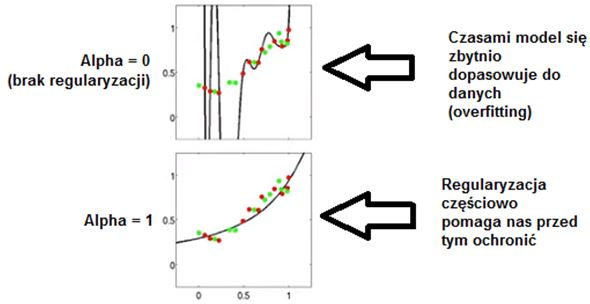

Są jeszcze pozostałe parametry, które zostaną dobrane i warto mieć świadomość, że można je modyfikować, np.:
* eval_metric -> metryka walidacji modelu. Domyślnie dla problemu regresji jest błąd średniej kwadratowej (RMSE) a dla klasyfikacji stosunek dobrych przypisani do złych (accurency).

##### Optymalizacja hiperparametrów 

Podejście klasyczne

Pierwszym podejściem byłoby zacząć od rozsądnych parametrów, ustawiając je w sposób intuicyjny.

Najrozsądniejszym jest rozpoczęcie od wartości:
* max_depth -> 3–10
* n_estimators -> 100 (wiele obserwacji) do 1000 (kilka obserwacji)
* learning_rate -> 0,01–0,3
* colsample_bytree -> 0,5–1
* podpróbka -> 0,6–1

Następnie można skupić się na optymalizacji max_depth i n_estimators .

Można wtedy manewrować z learning_rate i zwiększyć go, aby przyspieszyć model bez zmniejszania wydajności. Jeśli stanie się szybszy bez utraty wydajności, można zwiększyć liczbę estymatorów, aby spróbować zwiększyć wydajność.

Wreszcie można pracować z parametrami regularyzacji, zwykle zaczynając od alfa i lambda. Dla gamma 0 oznaczałoby brak regularyzacji, 1–5 to powszechnie używane wartości, podczas gdy 10+ byłoby uważane za bardzo wysokie.

Pierwszy algorytm optymalizujący - wyszukiwanie w siatce

Ponieważ XGBoost jest dostępny w sposób zgodny ze Scikit-Learn, możesz pracować z funkcjami optymalizatora hiperparametrów Scikit-learn. Najpopularniejszym z nich jest wyszukiwanie siatki.

Przeszukiwanie siatki to wyczerpujące przeszukiwanie każdej kombinacji określonych wartości parametrów. Jeśli określisz 2 możliwe wartości dla max_depth i 3 dla n_estimators , Grid Search przeprowadzi iterację w 6 możliwych kombinacjach:
* max_depth: [3,6],
* n_estimators: [100, 200, 300]

Dałoby to następujące możliwości: max_depth: 3, n_estimators: 100
max_depth: 3, n_estimators: 200
max_depth: 3, n_estimators: 300
max_depth: 6, n_estimators: 100
max_depth: 6, n_estimators: 200
max_depth: 6, n_estimators: 300

Klasycznym podejściem jest zastosowanie GridSearchCV() z Scikit.

Parametr param_grid: GridSearchCV pobiera listę parametrów do przetestowania na wejściu. Jak powiedzieliśmy, wyszukiwanie siatkowe przetestuje każdą kombinację. Po zastosowaniu GridSearchCV(), otrzymamy zestaw optymalnych parametrów, co zostanie pokazane w przykładach.

Drugi algorytm optymalizujący - wyszukiwanie losowe

Wyszukiwanie losowe wykorzystuje duży (prawdopodobnie nieskończony) zakres wartości hiperparametrów i losowo wykonuje iterację określoną liczbę razy po kombinacjach tych wartości. W przeciwieństwie do wyszukiwania siatkowego, które iteruje po każdej możliwej kombinacji, w przypadku wyszukiwania losowego określamy liczbę iteracji.

wprowadza się 10 możliwych wartości dla max_depth , 200 możliwych wartości dla n_estimators i wybiera 10 iteracji :

max_depth: np.arrange (1,10,1),
n_estimators: np.arrange (100,400,2)

Przykład losowych możliwości z 10 iteracjami:
1: max_depth: 1, n_estimators: 110
2: max_depth: 3, n_estimators: 222
3: max_depth: 3, n_estimators: 306
4: max_depth: 4, n_estimators: 102
5: max_depth: 1, n_estimators: 398
6: max_depth: 6, n_estimators: 290
7: max_depth: 9, n_estimators: 102
8: max_depth: 6, n_estimators: 310
9: max_depth: 3, n_estimators: 344
10: max_depth: 6, n_estimators: 202

Pondato, do tego celu używa się RandomSearchCV () z Scikit.

### Xgboost - regresja

##### Unikalne drzewa Xgboost i jak ich użyć dla regresji ? 

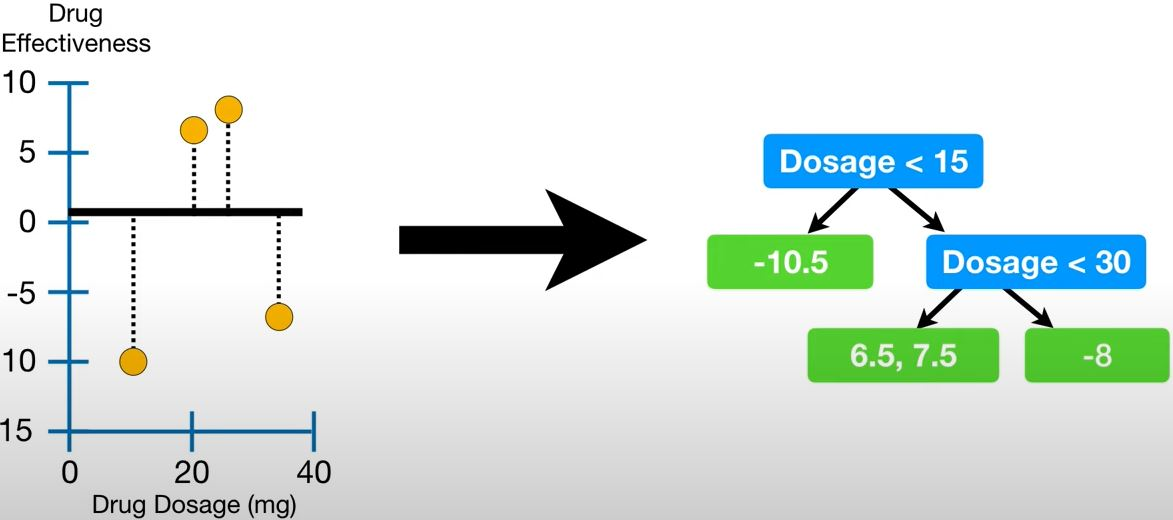

Rozważmy sytuację dla bardzo prostych danych treningowych.
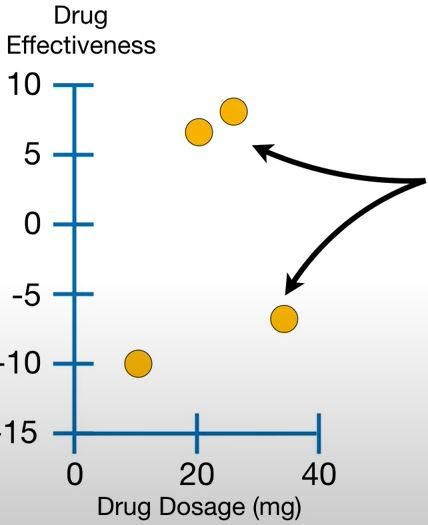
Na osi x mamy różne dawki leków, na osi y mamy skuteczność leku.

Górne dwie obserwacje przyjmują stosunkowo duże wartości dodatnie na osi y, co oznacza, że lek jest pomocny.
Dolne dwie obserwacje przyjmują stosunkowo małe wartości ujemne na osi y, co oznacza, że lek jest bardziej szkodliwy, niż pomocny.

Pierwszym krokiem dopasowania Xgboost do danych treningowych jest dokonanie wstępnej predykcji. Prognoza może być dowolna, ale domyślnie jest to 0.5, niezależnie od tego, czy stosujemy Xgboost do regreji, czy klasyfikacji.
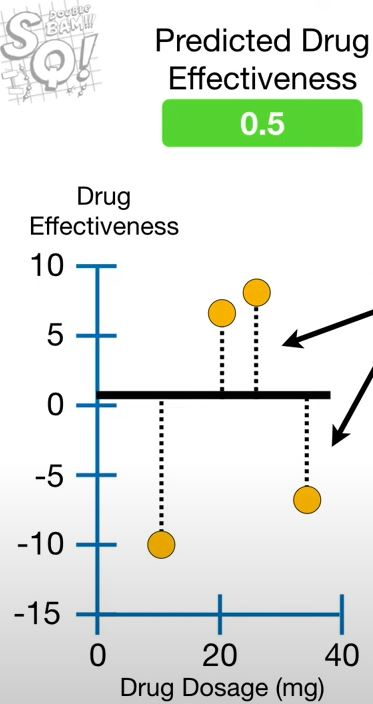
Prognoza na poziomie 0.5 odpowiada ciągłej czarnej linii. Reszty różnicowe to z kolei różnice między wartościami obserwowanymi i przewidywanymi. Pokazują nam one, jak dobre jest teraz wstępne prognozowanie.

Xgboost dopasowuje drzewo regresji do reszt. Korzysta on jednak z unikalnego drzewa, tzw. Xgboost tree.

##### Budowa Xgboost tree 

Każde drzewo zaczyna się od pojedynczego liścia, do którego trafiają wszystkie reszty.
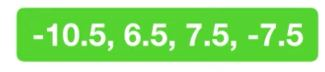
Następnie oblicza się Quality Score lub Similarity Score dla reszt.

Similarity Score to suma reszt do kwadratu dzielona przez ilość reszt plus lambda - parametr regularyzacji.
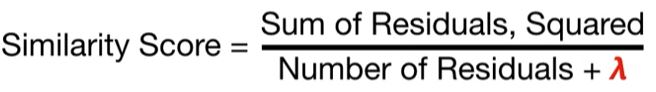
Uwaga: regularyzacja - metoda służąca do rozwiązania nadmiernego dopasowania

Załóżmy, że na początku lambda = 0. Jako że w liściu są 4 reszty, otrzymujemy:
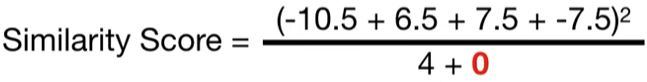
Stąd otrzymujemy, że Similarity Score = 4, czyli podobieństwo wynosi 4.

Pytanie, czy możemy lepiej wykonać grupowanie podobnych reszt, jeśli podzielimy je na 2 grupy ? By odpowiedzieć na to pytanie, skupmy się na 2 obserwacjach o najmniejszych wartościach na osi x.
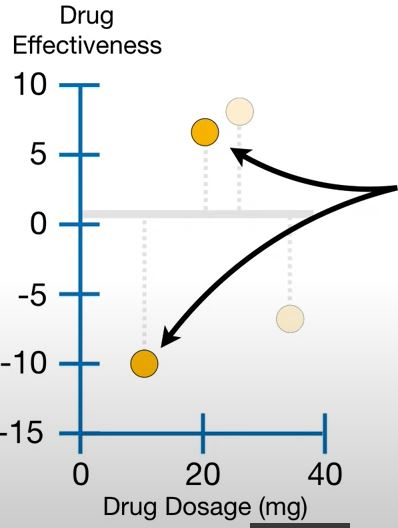
Średnia dawka wynosi 15 ((10+20)/2). Podzielmy więc obserwacje na 2 grupy: dawka < 15 lub nie. Następnie reszty z wartością poniżej 15 trafiają do lewego liścia, a pozostałe do prawego.

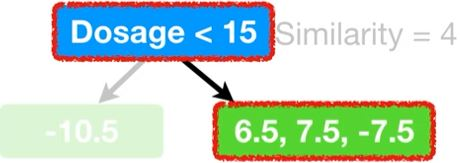
Następnie obliczamy Similarity Score dla liścia po lewej wstawiając resztę -10.5  do licznika, wtedy Similarity Score = 110.25.

Postępując analogicznie jak wcześniej, dla prawego liścia Similarity Score wyniesie 14.08.

Mając obliczone wyniki podobieństwa dla każdego węzła widzimy, że gdy reszty w węźle są bardzo różne, znoszą się nawzajem (np. +-7.5 w prawym liściu), co implikuje, że Similarity Score jest dość niski. Przeciwnie sytuacja się ma dla podobnych reszt.

Teraz należy określić, o ile lepiej liści grupują podobne reszty. Robi się to wyznaczajac zysk z dzielenia reszt na 2 grupy. Jest to suma Similarity Score w każdym z liści z osobna pomniejszona o wynik podobieństwa korzenia:
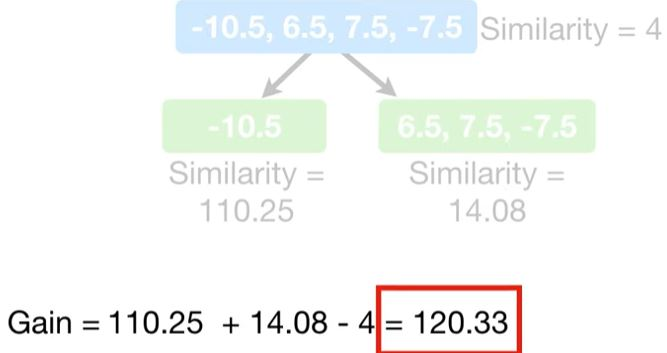

Teraz można porównać zysk dla obliczonego podziału (treshold < 15) i innych tresholdów. Próg przesuwa się tak, aby był on średnią z dwóch kolejnych obserwacji, a następnie buduje się proste drzewo, które dzieli obserwacje z nowym progiem.

Nowy treshold to 22.5, a zysk wynosi 4.
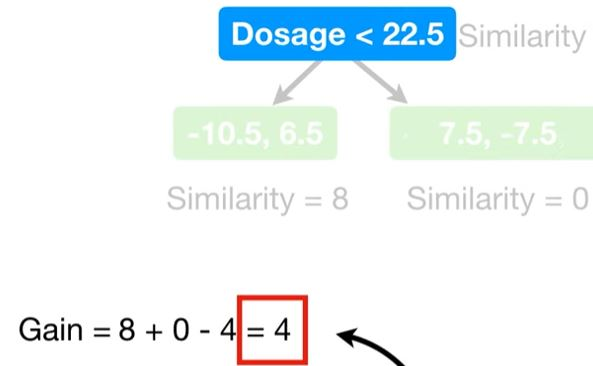
Jest on mniejszy niż poprzednio (120.33). Wniosek stąd taki, że lepiej dzielić reszty w klastry o podobnych wartościach.

Dla progu 30 zysk wynosi 56.33, znów jest on gorszy niż dla pierwszego tresholdu.

Ostatecznie, największy zysk jest dla 1. gałęzi drzewa.

W 1. przypadku mamy 1 resztę po lewj stronie - nie dasię podzielić, i 3 reszty w prawym liściu, które można podzielić. Procedura jest w pełni analogiczna jak wcześniej. Zaczynamy od obu ciemnożółtych kropek i liczymy średnią.
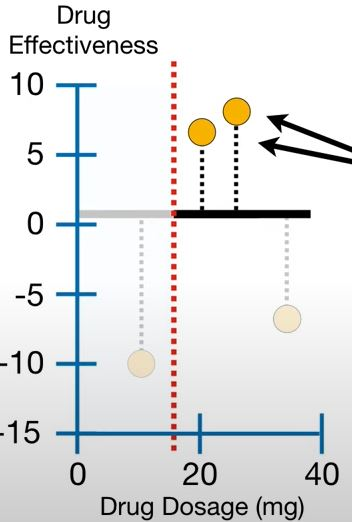
Treshold wynosi 22.5, zysk jest równy 28.17.

Przesuwając znów próg w prawo, wynosi on 20, zysk to z kolei 140.17. Jest to więcej niż 28.17.

Ograniczając głębokość drzewa do 2, nie będziemy już dokonywać kolejnego podziału, więc budowa drzewa zostałą zakończona.

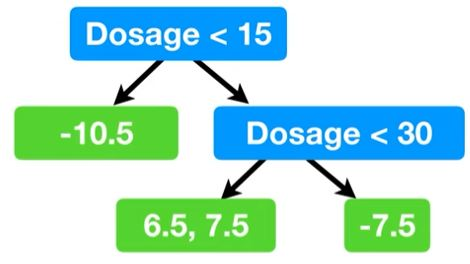
Uwaga: domyślnie przyjmuje się głębokość = 6.

##### Przycinanie (pruning) drzewa

Drzewo przycinamy na podstawie wartości zysku. Zaczynamy od wybrania liczby (tzw. gamma), np. 130. Wtedy oblicza się różnicę zysku z najniższej gałęzi i gammy. Jeśli różnica będzie ujemna, to będziemy usuwać gałąź. 
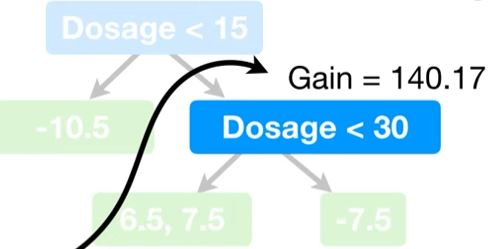
Na przykład, w tym przypadku wynik to 10.17, więc gałęzi nie usuwamy.

Dla korzenia zysk wyniósł 120.3, czyli różnica jest ujemna. Ale jako że nie usuneliśmy pierwszej gałęzi, to nie możemy usunąć korzenia.

Ale dla gammy = 150, usunelibyśmy tę gałąź. Wtedy jako że róznica między zyskiem z korzenia a lambdą jest też ujemna, usunelibyśmy i korzeń. Wtedy zostanie nam jedynie oryginalna prognoza na poziomie 0.5.

##### Budowa drzewa z regularyzacją 

Wróćmy do bazowych wartości i załóżmy lambda = 1, drzewo budujemy analogicznie. Lambda to parametr regularyzacji, czyli ma za zadanie zmniejszyć wrażliwość predykcji na pojedyncze obserwacje.

Dla korzenia otrzymamy wówczas Simirality Score = 3.2. Dla korzenia przy lambda = 0 mieliśmy wartość 4.

Dla lewego liścia mamy teraz 55.12, to też mniej niż dla lambda = 0.

Dla prawego liścia mamy teraz 10.56, to też mniej niż dla lambda = 0.

Wniosek: Simirality Score jest odwrotnie proporcjonalny do ilości reszt. Na przykład, liść po lewej stronie miał 1 resztę, a największy spadek.

Ogólnie, gdy lambda > 0, to łatwiej jest przycinać liście, gdyż wartości zysku są mniejsze. Ustawienie lambda = 1, często zapobiega overfittingowi danych treningowych.

##### Obliczanie wartości wyjściowych dla drzewa XGBoost 

Niezależnie od lambdy i gammy określmy wartości wyjściowe dla liści. 
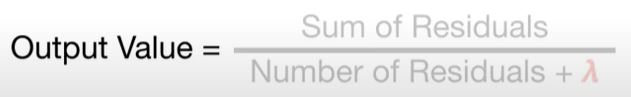

Dla przykładu, output value dla lewgo liścia wynosi -10.5 (gdy nie ma regularyzacji, tj. lambda = 0)., dla lambda = 1 mamy -5.25.
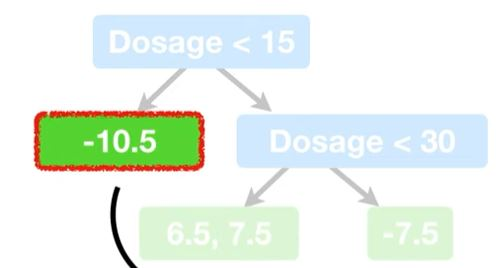
Ogólnie, gdy lambda zmniejsza więc czułość predykcji pojedynczej obserwacji. 

Dla lambda = 0 dostaniemy takie wartości:
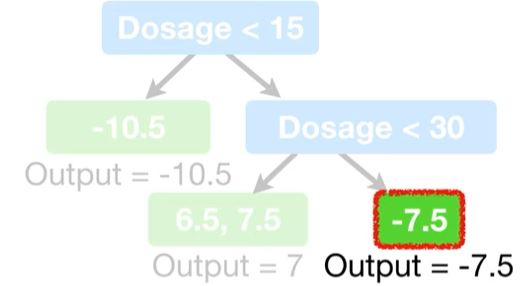
Mając te wartości, można przejść do tworzenia predykcji.

#####  Tworzenie przewidywań za pomocą XGBoost 

Xgboost tworzy nowe prognozy zaczynając od wstępnego przewidywania i dodając wynik drzewa przeskalowany o learning_rate (Eta, domyślnie Eta = 0.3), tzn. szybkość uczenia.
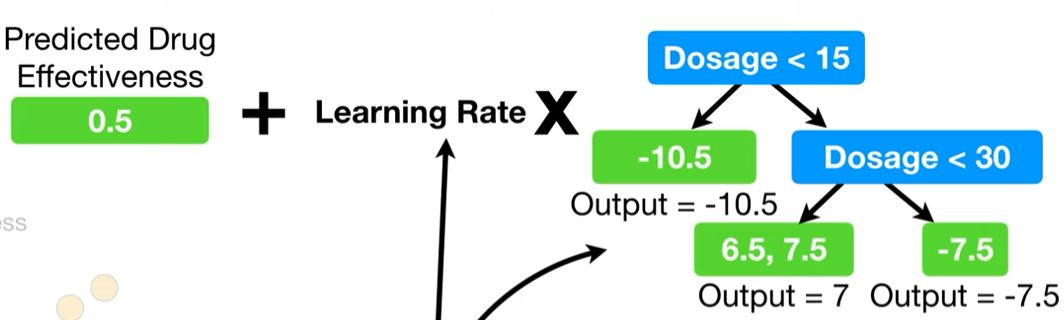
Do predykcji użyjemy wartości domyślnej dla obserwacji z wartością na osi x równą 10. 

Wtedy mamy: 0.5 + (0.3 x -10.5) = -2.65

Dla obserwacji z x=20 mamy predykcję 2.6, więc i tu jest lepiej niż w wstępnym przewidywaniu. Podobnie jest dla pozostałych obserwacji.

Wtedy, buduje się kolejne drzewo na podstawie nowych reszt i tworzy nowe prognozy, które dają jeszcze mniejsze reszty. Proces kontynuuje się do momentu, aż reszty będą bardzo małe.

### Xgboost - klasyfikacja

Cel: pokazanie, jak Cgboost trees są budowane dla klasyfikacji
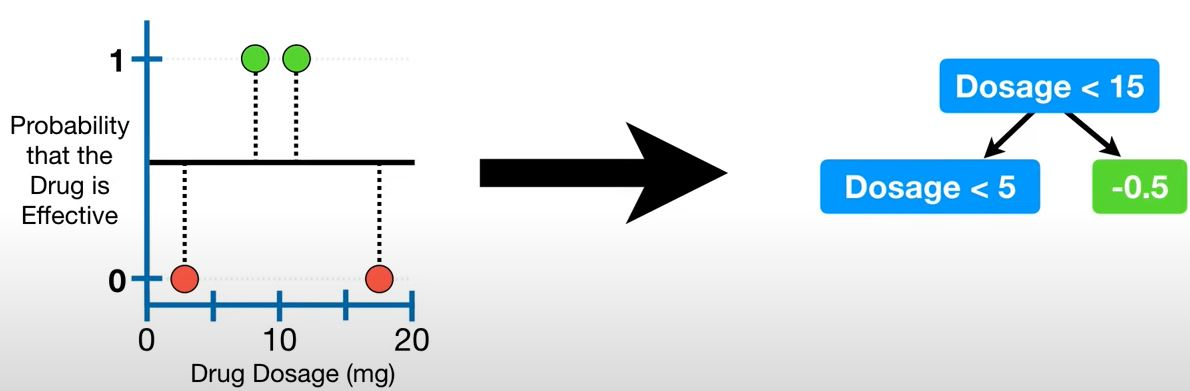

Do przedstawienia problemu użyjemy prostych danych treningowych, złożonych z 4 różnych dawek leków.

Zielone kropki oznaczają, że lek był skuteczny, czerwone, że nie.
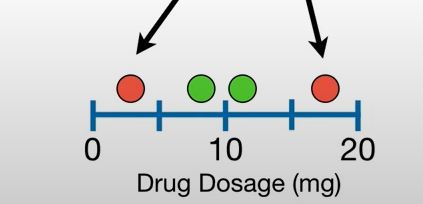

##### Budowa drzewa 

Pierwszym krokiem dopasowania Xgboost do danych treningowych jest dokonanie wstępnej prognozy. Predykcją może być cokolwiek, np. prawdopodobieńśtwo skutecnzości leku na danych treningowych. Domyślnie to 0.5, niezależnie czy uzywamy Xgboost w regresji czy klasyfikacji.

Możemy to zilustrować dodając oś y, na której jest to prawdopodobieństwo.
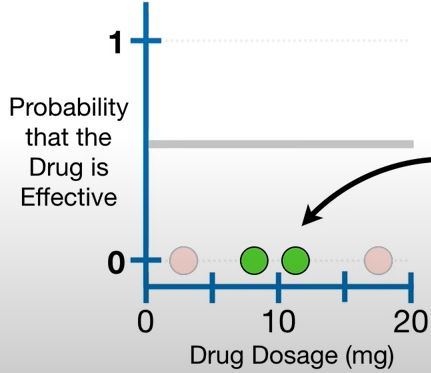

Jako że zielone kropki oznaczają skuteczny lek, przeniesiemy je na poziom y = 1. Czerwone kropki wskazują, że prawdopodobieństwo skutecnzości leku wynosi 0.

Reszty pokazują nam, jak dobra jest wstępna predykcja.

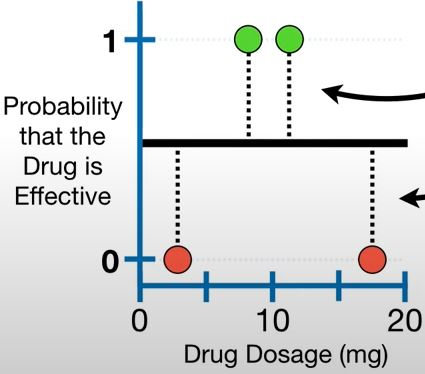
Analogicznie jak dla regresji, dopasowujemy drzewo do reszt. Wzór na Similarity Score jest jednak inny. Licznik jest ten sam, różnica jest w mianowniku.

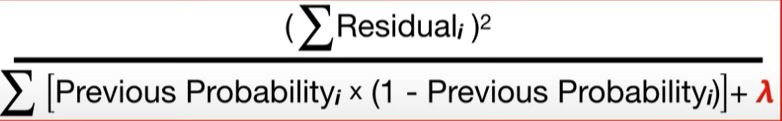

Budowę każdego drzewa zaczyna się od pojedynczego liścia, do którego trafiają wsyzstkie reszty. Mamy więc wartości w nim: -0.5, 0.5, 0.5, -0.5. Similarity Score wynisie 0, bo licznik się wyzeruje.

Następnie trzeba się zastanowić, czy możemy otrzymać lepsze wyniki grupując reszty na 2 grupy. Niech najpierw treshold wynosi 15, ponieważ to średnia między dwoma ostatnimi obserwacjami.
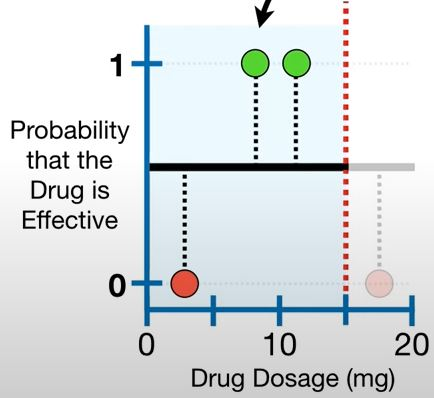
Wtedy 3 reszty trafiają do lewego liscia, a jedna do prawego.

Jako że budujemy pierwsze drzewo, poprzednie prawdopodobieństwo odwołuje się do początkowego liścia, więc wstawiamy 0.5 dla każdej reszty, która znalazła się w liściu. Dla ułatwienia obliczeń wstawmy lambda = 0. Z regresji wiemy jednak, że lambda zmniejsza Similarity Score, co ostatecznie ułatwia przycinanie liści.
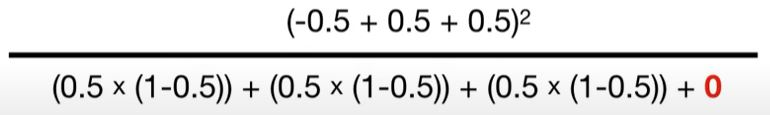
Tak wygląda po rozpisaniu nasz wzór na Similarity Score dla lewego liścia. Po uproszczeniu wynik to 0.33.

Dla prawego liścia mamy wynik 1.
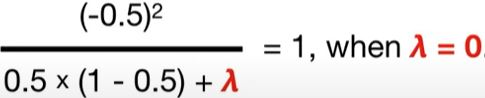
Zysk liczy się tak samo jak dla regresji, Gain = 0.33 + 1 - 0 = 1.33. To wynik dla tresholdu równego 15.

Dal każdego innego podziału nie otrzymamy większego zysku, co oznacza, że Dossage < 15 będzie pierwszą gałęzią w naszym drzewie.

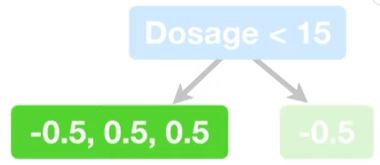
Następnie analogicznie należy skupić sie na dzieleniu reszt z lewego liścia.

Bez zbędnych obliczeń widać, że należy ustawić treshold na poziomie 5. Jest to spowodowane tym, że jako że przy treshold = 5 po lewej stronie zostanie nam 1 dawka negatywna, a po prawej dwie pozytywne, to otrzymamy większy zysk, niż dla tresholdu równego 10, bo wtedy dawki po lewej stronie się zniosą. Wyniki zysku będą odpowiednio wynosić: 2.66 i 0.66.

Przy ustaleniu głębokości równej 2, drzewo będzie ostatecznie wyglądać tak:
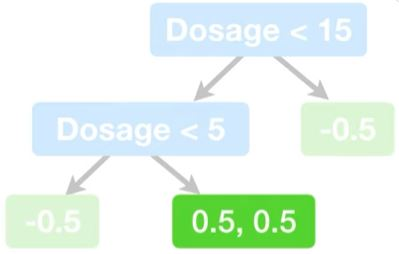
Uwaga: Xgboost ma próg minimalnej ilości reszt w liściu. Liczba ta jest określana przez obliczenie tzw. Cover - pokrycia. Cover jest definiowany podobnie jak mianownik Similarity Score, z tymże przy lambdzie mamy minus, zamiast plusa. 

Dla regresji natomiast Cover jest równy domyślnie liczbie reszt w liściu, domyślnie minimalny Cover wynosi 1.

A więc dla klasyfikacji problem ten jest bardziej złożony, gdyż pokrycie zależy od wcześniej przewidywanego prawdopodobieństwa każdej reszty w liściu. 

Np., cover dla tego liścia 
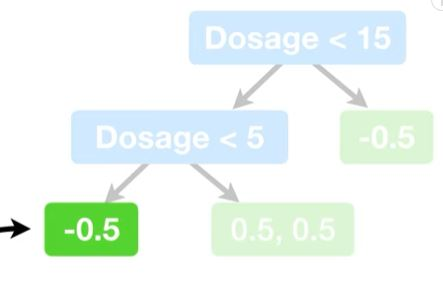
jest wcześniej przewidywanym prawdopodobieńśtwem (0.5) pomnożonym przez (1 - 0.5), co wynosi 0.25.

Jako że domyślna minimalna wartość Cover wynosi 1, to algorytm Xgboost nie zezwoli na ten liść, tak jak na liść złożony z reszt 0.5 i 0.5, gdzie Cover wynosi 0.5.

W związku z tym usuwamy te liście i wracamy do wcześniego liścia.  W misjcu Dossage < 5 były reszty: -0.5, 0.5, 0.5, więc Cover to 0.75. Ostatecznie zostaniemy tylko z korzeniem.

Ale Xgboost wymaga, by drzewo było większe niż sam korzeń, stąd ustawia się minimalny Cover na poziomie 0.

##### Przycinanie (pruning) drzewa 

Analogicznie jak dla regresji, drzewo przycinamy obliczając różnicę między zyskiem z najniższej gałęzi a wartością gamma. Np., dla zysku 2.66 i gammy równej 2 nie przycinamy, bo różncia jest dodatnia.

Ponadto, wartości lambda większe niż 0 zmniejszają wrażliwość drzewa na pojedyncze obserwacje poprzez przycinanie i łączenie ich z innymi obserwacjami.

##### Obliczanie wartości wyjściowych dla drzewa XGBoost 

Wyznaczmy otuput value dla drzewa niezależnie od lambda i gamma dla liści. W klasyfikacji, wartość ta wyrażona jest wzorem:
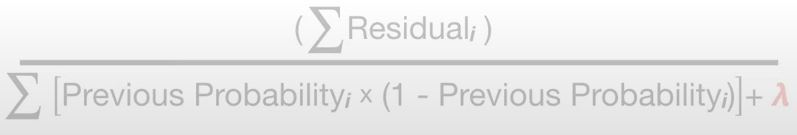

Więc, dla tego liscia otrzymamy wartość -2, gdy nie zastosujemy regularyzacji, tj. ustawimy lambda = 0.
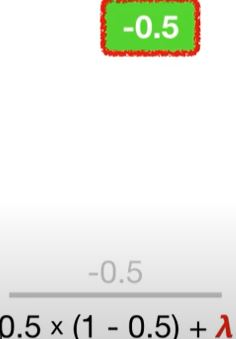
Dla lambda = 1 dostaniemy -0.4, więc wynik bliższy zeru. 

Dla prawego liścia, tj. z resztami 0.5 i 0.5, a także dla lambda = 0, dostaniemy wartość 2.
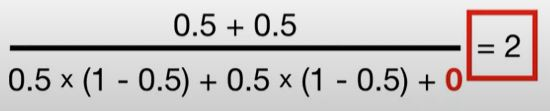
Dla ostatniego liścia dla lambda = 0 dostajemy -2. Drzewo jest ukończone.

#####  Tworzenie przewidywań za pomocą XGBoost 

Znów zaczynamy od prognozy początkowej. Trzeba tę wartość przekonwertować na wartość logarytmicznej szansy "log(odds)". odds = (1-p)/p, więc przez to otrzymujemy następujący wzór: 
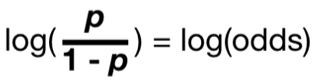
Za p wstawiamy 0.5, stąd dostaniemy, że log(odds) = 0.

Następnie, dodajemy log(odds) początkowej predykcji do output value skalowanego przez learning rate (default: 0.3).

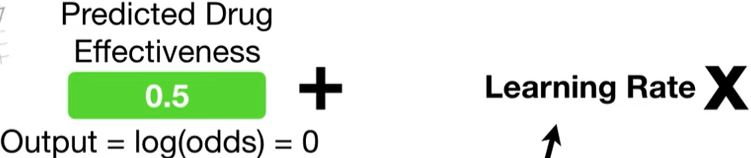

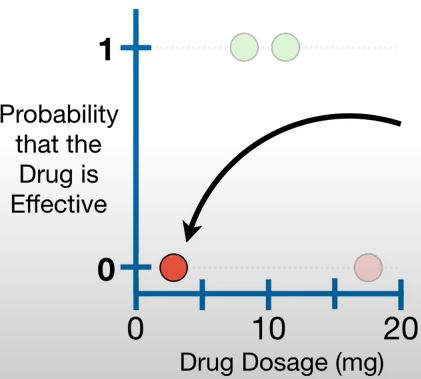

Dla tej obserwacji nowa wartość predykowana to logarytm szans dla pierwotnej prognozy (tzn. 0) + 0.3 x -2 (to output value dla lewego liścia), co daje log(odds) = -0.6

Musimy to przekonwertować na prawdopodobieństwo, użyjemy do tego tego wzoru:
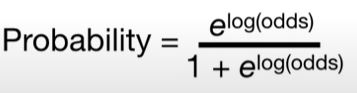
Nowa wartość predykowana wyniesie 0.35.

Zgodnie z oczekiwaniami, otrzymujemy mniejszą resztę:
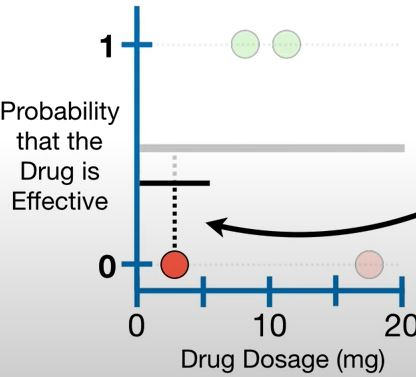

Predykcja dla obserwacji z Dossage = 8. Wtedy dsotaniemy: 0 + 0.3 x 2 => log(odds) = 0.6. Probability = 0.65. Ponownie reszta jest mniejsza niż pierwotna.
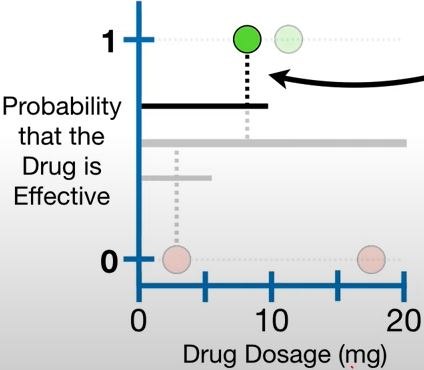
Podobnie, lepsze wyniki uzyskamy dla kolejnych obserwacji. Możemy więc zbudować nowe drzewo pasujące do nowych reszt.

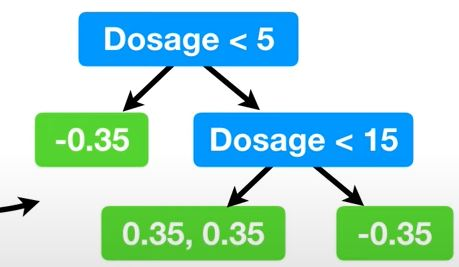
Uwaga: obliczenie Output Value oraz Simirality Score byłoby już nieco trudniejsze w tym przypadku.

Niemniej jednak, mając nowe drzewo, dodajemy je do poprzednich predykcji i tworzymy nowe predykcje, które implikują jeszcze mniejsze reszty. Proces powtarzamy aż reszty będą bardzo małe lub osiągnęliśmy maksymalną ilość drzew.

### Xgboost - wzory
##### Powiązanie regresji i klasyfikacji
##### Pokazanie, dlaczego tworzenie drzew unikalnych ma tak duży sens

Zarówno dla regresji jak i klasyfikacji, budujemy drzewa na podstawie Similarity Score, a następnie obliczamy Output Value dla liści. Teraz pokażemy różnicę w funkcji straty.
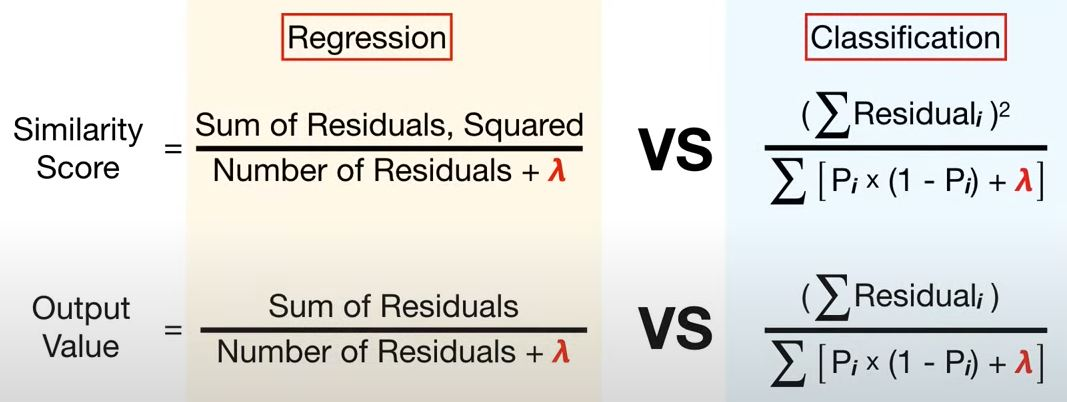
Uwaga: Lambda powinna być na zewnątrz sumy.

Zaczniemy od prostego przykładu danych treningowych dla regresji
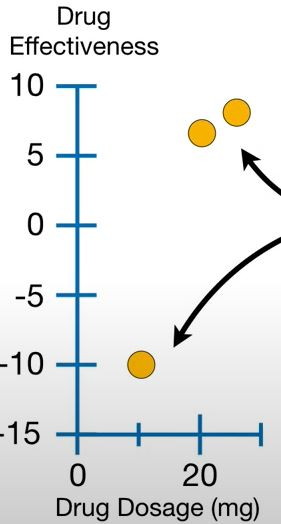

oraz zestawu danych dla klasyfikacji:
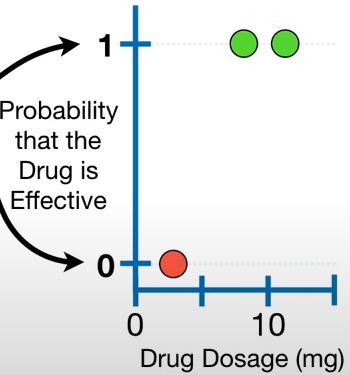

W przypadku regresji mając na osi x dawki leku, chcemy przewidzieć skuteczność leku na osi y. W klasyfikacji chcemy przewidzieć prawdopodobieństwo, że lek będzie skuteczny. W obu przypadkach zaczyna się od początkowej prognozy 0.5. Reszty pokazują nam, jak dobre jest dopasowanie. Jak dobre jest dopasowanie możemy określić za pomocą funkcji straty.
Dla regresji wzór na funkcję straty w Gradient Boostingu wygląda następująco:
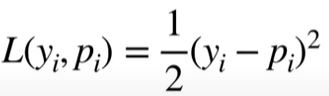
Przy czym y to wartość na osi y, p to prawdopodobieństwo.

Np., dla początkowej prognozy 0.5, otrzymamy wynik 104.4:
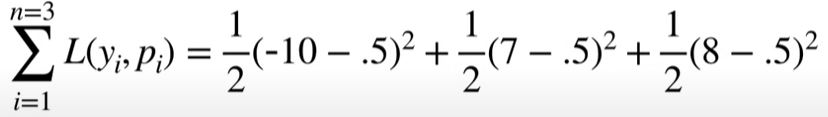
Potem można użyć tej funkcji straty do nowych predykcji i porównać wyniki by określić, czy nasze wyniki się poprawiają, czy nie.

Dla klasyfykacji funkcja straty dla Gradient Boostingu wygląda następująco:
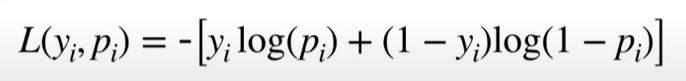

Mając obydwie funkcje straty dla Gradient boostingu, Xgboost używa ich do budowanie drzew poprzez minimalizację równania:
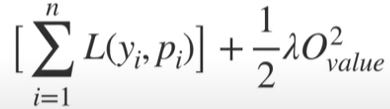
Pierwsza składowa to funkcja straty, a druga związana jest z regularyzacją.

Celem jest znalezienie Output Value (O_Value), która minimalizuje całe równanie. Jeśli lambda jest dodatna, to zmniejszymy wartoćś wyjściową.

Jako że optymalizujemy Output Value z 1. drzewa, możemy zastąpić predykcję p_i wartością początkową p^0 powiększoną o Output Value z nowego drzewa.

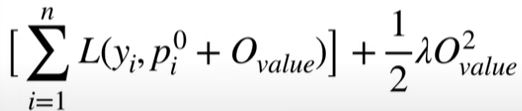
Użyjmy tego wyrażenia do budowy pierwszego drzewa.

Zaczynamy od umieszczenia wsyzstkich reszt w jednym liściu [-10.5, 6.5, 7.5], następnie szukamy Output Value dla liścia minimalizując nasze równanie.

Dla ułatwienia, przyjmijmy, że lambda = 0, co implikuje usunięceim członu odpowiadającego za regularyzację.

Jeśli wstawimy za O_value 0, to zostanie nam funkcji straty dla pierwotnej predykcji. Wynik ten sma jak dla przypadku z regresją, tj. 104.4. Wynik na wykresie prezentuje się następująco:
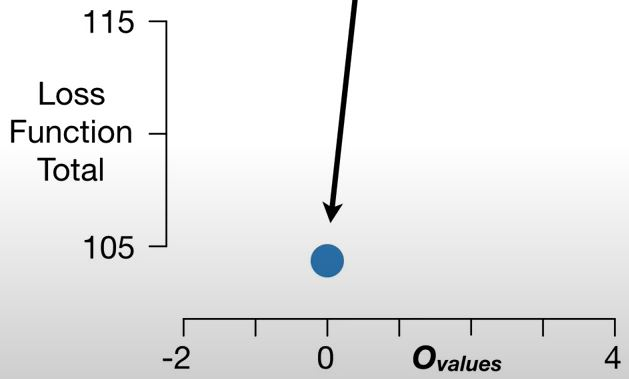

Dla Output value = -1, nowa prognoza to -0.5 = 0.5 + -1. Zmnijesza to resztę dla y_1, ale powiększa dla pozostałych. 
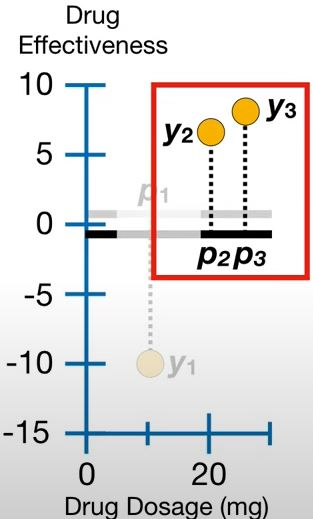
Ostateczny wynik dla -1 to 109.4. Stąd wiemy, że -1 to gorszy wybór niż 0, ponieważ większa jest funkcja straty.
Dla 1 nowa prognoza to +1.5 mamy 102.4, co jest najlepsze spośród tych 3 wartości.

Możnaby dalej wybierać losowe wartości (by uzyskać mniejszą wartości funkcji straty), ale lepszym rozwiązaniem jest narysować krzywą z której widać, że optymalna loss function total jest dla wartości 0.
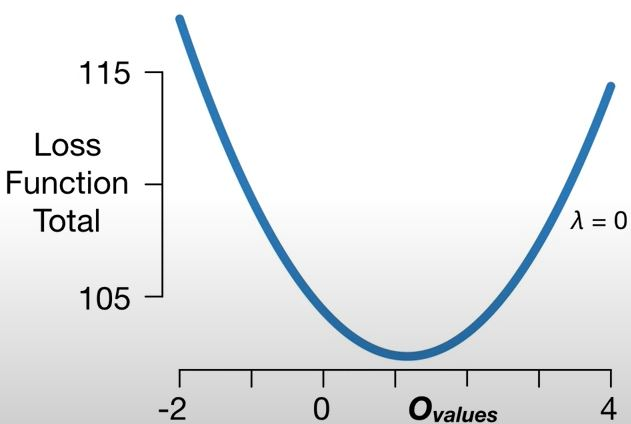
Niemniej jednak, inaczej wykres będzie wyglądał dla innej lambdy. Im większy nacisk kładziemy na karę za regularyzację poprzez zwiększanie lambda, tym O_value jest bliższe zeru.

L(y,p_i) oznacza funkcję straty dla poprzedniego prognozowania. Kolejne człony to odpowiednio I i II pochodna funkcji straty. I pochodna związana jest z gradientem, stąd oznaczamy ją g. II pochodna z hesjanem, stąd h.

Chcemy znaleźć Output Value, które minimalizuje funkcję straty + regularyzację.  Po przekształceniach i pozbyciu się składowych niemających wpływu na optymalizację, otrzymuje się wzór: 
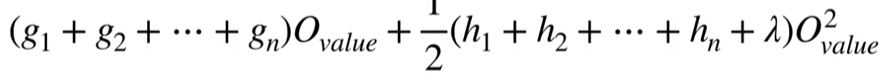

Żeby zminimalizować wartości funkcji: bierze się pochodną względem O_value i przyrównuje do zera, a potem szuka się O_value.
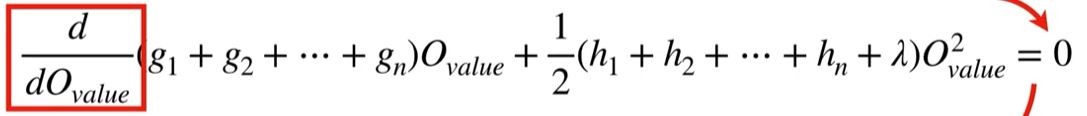

Pochodna z 1. członu względem O_value to suma g_i. Pochodna z 2. członu da nam O_value x suma h_i i lambda. Po przekształceniach otrzymujemy: 
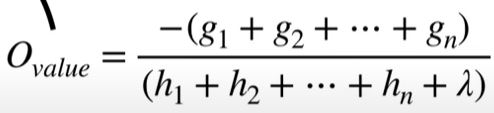

Dla regresji funkcja straty wyglądała tak:
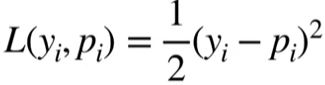

Pierwsza pochodna, czyli gradient, g_i, względem predykwoanej wartości p_i wynosi -(y_i - p_i). Innymi słowy, g_i jest ujemną resztą. 
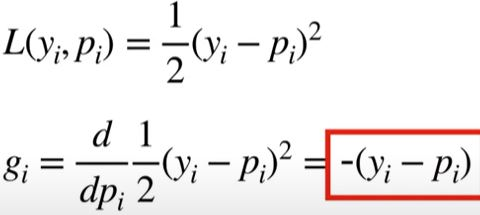

Wykonując pozostałe przekształcenia, dostaniemy nastepujący wzór na Output Value dla regresji:
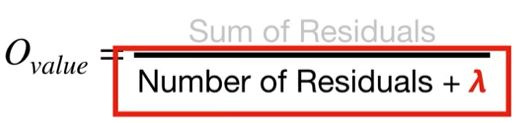

Dla klasyfikacji najczęściej spotykaną funkcją straty jest:
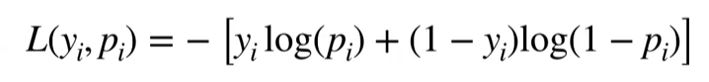

Wykonując pewne przekształcenia, dostaniemy nastepujący wzór na Output Value dla klasyfikacji:
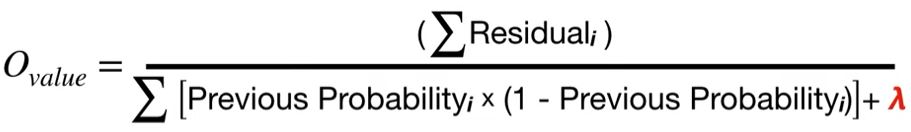

Niezależnie od tego, czy używamy Xgboost dla regresji czy klasyfikacji, możemy obliczyć optymalną wartość dla liścia wstawiając pochodne funkcji strat:
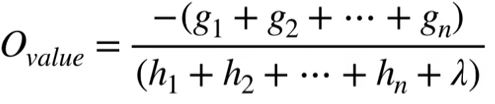

Teraz potrzebne są równania dla Similarity Score, aby zbudować drzewa. Równanie wygląda następująco:
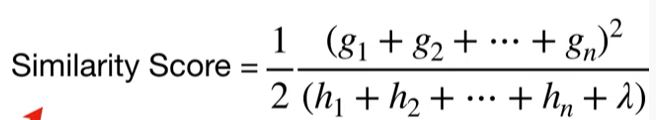

### Xgboost - optymalizacje, gdy zbiór danych treningowych jest ogromny 

Celem optymalizacji jest przyspieszenie procesu szukania optymalnych podziałów itp. Przy bardzo wielu obserwacjach, zamiast testować każdy treshold, możemy podzielić dane na kwantyle i użyć kwantyli jako kandydatów na tresholdy do podzielenia obserwacji. 

Wykonuje się to z użyciem algorytmu zachłannego - Approximate Greedy Algorithm. Używa on pierwszego kwantyla do zdefiniowania pierwszego tresholdu. W drugim kwantylu jest drugi treshold do rozważenia itd.

Jeśli użyjemy tyko 1 kwantyla i podzielimy obserwacje na pół, wtedy ten kwantyl będzie tresholdem. Znalezienie najlepszego progu byłoby wtedy bardzo szybkie, ponieważ nie trzeba by było wtedy obliczyć zysku by podjąć decyzję.

Poniewż obie strony podziału reprezentują ludzi o dodatniej jak i ujemne skuteczności leku, to ten treshold nie sprawdziłby się dobrze do predykcji. Dla dwóch kwantyli moglibyśmy mieć lepsze wyniki, gdyż względnie oddzielibyśmy dodatni od ujemnych wartości.
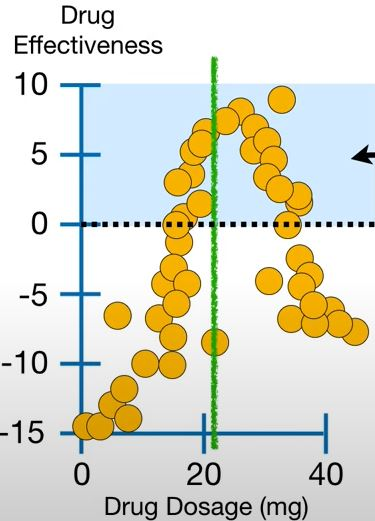


Uwaga - przypomnienie:
* kwantyl - Kwantylem rzędu p \in [0,1] zmiennej losowej X nazywamy taką wartość zmiennej losowej x_p, dla której spełnione są nierówności: P_x((-oo,x_p]) >= p oraz P_x([x_p,oo)). Np. kwantyl rzędu 1/2 to inaczej mediana. Kwantyle rzędu 1/4, 2/4, 3/4 są inaczej nazywane kwartylami.
* percentyl - kwantyl rzędu k/100, np. Kwantyl rzędu 1/100, 2/100,..., 99/100

Dla większej ilości kwantyli, moglibyśmy uzsykać jeszcze lepsze wyniki. Jednak im więcej kwantyli, tym więcej tresholdów do testowania, co implikuje dłuższe budowanie drzewa. 

Dla Xgboost Approximate Greedy Algorithm zamiast testowć wszystkie tresholdy, testujemy tylko kwantyle, domyślnie algorytm używa około 33 kwantyli, które są ważone - mają odpowiednie wagi. Każda obserwacja ma odpowiednią wagę, a suma wag jest taka sama w każdym kwantylu. Wagi są tworzone na podstawie Covera. Waga każdej obserwacji jest drugą pochodną funkcji straty. W przypadku regresji każdy kwantyl ma wagę 1 ,więc są to zwykłe kwantyle. W klasyfikacji natomaist wagi są liczone wg wzoru:
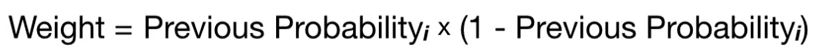

By sprawdzić, jaki wpływ mają wagi na kwantyle, rozpatrzmy prosty zbiór treningowy.
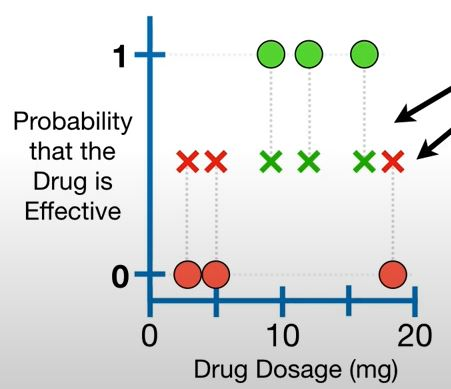
Krzyżyki odpowiadają wcześniej przewidywanym prawdopodobieństwom, że dwai są skuteczne, zaczęliśmy od 0.5.

Zwykle, dalsze przewidywania (jak było widać na wcześniejszych przykładach) ulegają poprawie.

Przykład obliczania wag:

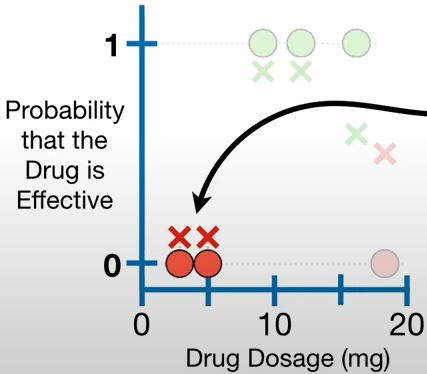
Te prawdopodobieństwa są bardzo bliskie 0 co wskazuje na to, że jest duża pewność w sklasyfikowaniu ich jako nieefektywnych. Jako że prawdopodobieństwo obu punktów wynosi 0.1, to waga wynosi: 0.1 x (1 - 0.1) = 0.09. Ta sama waga będzie dla dwóch następnych kropek, gdzie prawdopodobieństwo wynosi 0.9. Następna waga wynosi 0.24, bo 0.6(0.4) x (1 - 0.6(0.4)).

Wniosek: Gdy prawdopodobieństwa oscylując wokół 0.5, wagi są dość duże, przeciwnie w drugą stronę jest.

Jak podzielimy teraz te dane na kwantyle. Xgboost używa kwantyli o podobnych sumach wag. 
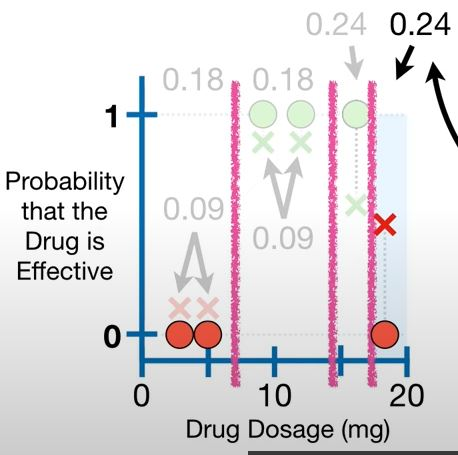
Tu, 1. kwantyl miałby sumę wag 0.18, 2. też, następne po 0.24. Ostatnie dwa mają po 1 obserwacji, aby sumy wag były podobne.

Więc, dla dużego zbioru, Xgboost stosuje algorytm zachłanny.

## Przykład 1 - StatQuest

Cel - budowa zbioru drzew wzmacnianych z wykorzystaniem ciągłych i kategorycznych danych z IBM Base Samples do przewidywania,
      czy klient przestanie korzystać z usług telekomunikacyjnych danej firmy.
      
Zbiór danych : Telco Churn dataset.

XGBoost to wyjątkowo przydatna metoda uczenia maszynowego, gdy nie chcemy rezygnować ze zdolności do poprawnego klasyfikowania 
obserwacji, ale nadal chcemy uzyskać model, który jest dość łatwy do zrozumienia i interpretacji.

Etapy tworzenia modelu:
1. import danych
2. braki danych 
* identyfikacja  
* rozwiązywanie problemu braków danych
3. formatowanie danych do Xgboost 
* podział danych na zmienne: zależne i niezależną  
* One-Hot-Encoding
* konwersja wszystkich kolumn na wartości Int, Float lub Bool  
4. tworzenie wstępnego modelu XGBoost
5. optymalizacja parametrów za pomocą walidacji krzyżowej i funkcji GridSearch()
* learning rate [szybkość uczenia]  
* tree depth [głębokość drzewa]
* number of trees [ilość drzew] 
* gamma (for pruning) [gamma dla przycinania]  
* lambda (for regularization) [lambda dla regularyzacji]
6. budowanie, rysowanie, interpretacja i ocena zoptymalizowanego modelu XGBoost 

### Import pakietów 

Cel - dzięki nim możemy zaimportować dane, oczyścić je i sformatować, a następnie zbudować, ocenić i narysować model XGBoost.

Wymagania - Python 3 z następującymi wersjami modułów:
- pandas >= 1.2.3
- numpy >= 1.19.2
- sklearn >= 0.24.1
- xgboost >= 1.3.3

Uwaga: Do rysowania drzew konieczny jest pakiet "graphviz".

In [1]:
import pandas as pd # wczytanie i manipulacje danymi oraz One-Hot Encoding
import numpy as np # obliczenie średniej i odchylenia standartowego
import xgboost as xgb
from sklearn.model_selection import train_test_split # podział danych na zbiory treningowe i testowe
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer # obliczenia w czasie kroswalidacji
from sklearn.model_selection import GridSearchCV # kroswalidacja
from sklearn.metrics import confusion_matrix # tworzenie macierzy pomyłek
from sklearn.metrics import plot_confusion_matrix # rysowanie macierzy pomyłek

Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
import sklearn as skl
import graphviz as grap

### Import zbioru danych 

Teraz wczytujemy zbiór danych z bazy IBM Base Samples. W szczególności użyjemy zbioru danych Telco Churn Dataset. 
Ten zbiór danych pozwoli nam przewidzieć, czy ktoś przestanie korzystać z usług firmy Telco, czy nie, przy użyciu różnych typów danych ciągłych i kategorycznych.

In [3]:
df=pd.read_excel('dane1.xlsx', engine='openpyxl')

In [4]:
df.head() # wyświetlenie pierwszych 5 obserwacji

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65         820.5   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70        5036.3   

  Churn Label Churn Value Churn Score  CLTV                   Churn Reason  
0         Yes           1          86  3239   Competitor made better offer  
1         Yes           1          67  2701                          Moved  
2         Yes           1          86  5372                          Moved  
3         Yes           1          84  5003                          Moved  
4         Yes           1          89  5340  Competitor had better devices  

[5 rows x 33 columns]

In [5]:
df.info() # wyświetlenie podstawowych informacji o zbiorze danych

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

Celem modelu jest przewidywanie, czy klient przestanie korzystać z usług telekomunikacyjnych danej firmy. Ostatnie 4 zmienne
pochodzą z wywiadu tylko i wyłącznie od osób, które opuściły firmę. Nie chcemy ich więc w predykcji, gdyż zmienne te dałyby nam doskonałą możliwość predykcji, stąd zostaną one usunięte.

In [6]:
df.drop(['Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'],
        axis=1, inplace=True) ## ustawienie argumentu axis=0 to usuwa wiersze, axis=1 usuwa kolumny
df.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...   

  Device Protection Tech Support Streaming TV  Streaming Movies  \
0                No           No           No                No   
1                No           No           No                No   
2               Yes           No          Yes               Yes   
3               Yes          Yes          Yes               Yes   
4               Yes           No          Yes               Yes   

         Contract Paperless Billing             Payment Method  \
0  Month-to-month               Yes               Mailed check   
1  Month-to-month               Yes           Electronic check   
2  Month-to-month               Yes           Electronic check   
3  Month-to-month               Yes           Electronic check   
4  Month-to-month               Yes  Bank transfer (automatic)   

  Monthly Charges Total Charges Churn Value  
0           53.85        108.15           1  
1           70.70        151.65           1  
2           99.65         820.5           1  
3          104.80       3046.05           1  
4          103.70        5036.3           1  

[5 rows x 29 columns]

Niektóre z pozostałych kolumn zawierają tylko jedną wartość i nie są przydatne do klasyfikacji. Na przykład:

In [7]:
df['Count'].unique() # funkcja unique() zwraca unikalne wartości 

array([1], dtype=int64)

In [8]:
df['Country'].unique()

array(['United States'], dtype=object)

In [9]:
df['State'].unique()

array(['California'], dtype=object)

Możemy więc pominąć te zmienne. Zmienna City zawiera natomiast kilka różnych nazw miast, więc ją pozostawimy.

In [10]:
df['City'].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

Usuniemy także identyfikator klienta (`Customer ID`), ponieważ jest on inny dla każdego klienta i jest bezużyteczny do klasyfikacji. Na koniec usuniemy `Lat Long`, ponieważ istnieją osobne kolumny dla szerokości i długości geograficznej.

In [11]:
df.drop(['CustomerID', 'Count', 'Country', 'State', 'Lat Long'],
        axis=1, inplace=True) 
df.head()

City  Zip Code   Latitude   Longitude  Gender Senior Citizen  \
0  Los Angeles     90003  33.964131 -118.272783    Male             No   
1  Los Angeles     90005  34.059281 -118.307420  Female             No   
2  Los Angeles     90006  34.048013 -118.293953  Female             No   
3  Los Angeles     90010  34.062125 -118.315709  Female             No   
4  Los Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure Months Phone Service  ... Device Protection  \
0      No         No              2           Yes  ...                No   
1      No        Yes              2           Yes  ...                No   
2      No        Yes              8           Yes  ...               Yes   
3     Yes        Yes             28           Yes  ...               Yes   
4      No        Yes             49           Yes  ...               Yes   

  Tech Support Streaming TV Streaming Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless Billing             Payment Method Monthly Charges Total Charges  \
0               Yes               Mailed check           53.85        108.15   
1               Yes           Electronic check           70.70        151.65   
2               Yes           Electronic check           99.65         820.5   
3               Yes           Electronic check          104.80       3046.05   
4               Yes  Bank transfer (automatic)          103.70        5036.3   

  Churn Value  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 24 columns]

Uwaga: W przypadku rysowania drzewa nie można używać żadnych białych znaków. Zajmijmy się więc tym teraz, zastępując białą spację w nazwach miast znakiem podkreślenia _.

In [12]:
df['City'].replace(' ', '_', regex=True, inplace=True)
df.head()

City  Zip Code   Latitude   Longitude  Gender Senior Citizen  \
0  Los_Angeles     90003  33.964131 -118.272783    Male             No   
1  Los_Angeles     90005  34.059281 -118.307420  Female             No   
2  Los_Angeles     90006  34.048013 -118.293953  Female             No   
3  Los_Angeles     90010  34.062125 -118.315709  Female             No   
4  Los_Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure Months Phone Service  ... Device Protection  \
0      No         No              2           Yes  ...                No   
1      No        Yes              2           Yes  ...                No   
2      No        Yes              8           Yes  ...               Yes   
3     Yes        Yes             28           Yes  ...               Yes   
4      No        Yes             49           Yes  ...               Yes   

  Tech Support Streaming TV Streaming Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless Billing             Payment Method Monthly Charges Total Charges  \
0               Yes               Mailed check           53.85        108.15   
1               Yes           Electronic check           70.70        151.65   
2               Yes           Electronic check           99.65         820.5   
3               Yes           Electronic check          104.80       3046.05   
4               Yes  Bank transfer (automatic)          103.70        5036.3   

  Churn Value  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 24 columns]

In [13]:
df['City'].unique()[0:10]

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', 'Lynwood',
       'Marina_Del_Rey', 'Inglewood', 'Santa_Monica', 'Torrance',
       'Whittier', 'La_Habra'], dtype=object)

Musimy także wyeliminować białę znaki w nazwach kolumn, dlatego zastąpimy je podkreśleniami.

In [14]:
df.columns = df.columns.str.replace(' ', '_')
df.head()

City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
0  Los_Angeles     90003  33.964131 -118.272783    Male             No   
1  Los_Angeles     90005  34.059281 -118.307420  Female             No   
2  Los_Angeles     90006  34.048013 -118.293953  Female             No   
3  Los_Angeles     90010  34.062125 -118.315709  Female             No   
4  Los_Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure_Months Phone_Service  ... Device_Protection  \
0      No         No              2           Yes  ...                No   
1      No        Yes              2           Yes  ...                No   
2      No        Yes              8           Yes  ...               Yes   
3     Yes        Yes             28           Yes  ...               Yes   
4      No        Yes             49           Yes  ...               Yes   

  Tech_Support Streaming_TV Streaming_Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless_Billing             Payment_Method Monthly_Charges Total_Charges  \
0               Yes               Mailed check           53.85        108.15   
1               Yes           Electronic check           70.70        151.65   
2               Yes           Electronic check           99.65         820.5   
3               Yes           Electronic check          104.80       3046.05   
4               Yes  Bank transfer (automatic)          103.70        5036.3   

  Churn_Value  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 24 columns]

Usunięto wszystkie dane, które nie pomogą w stworzeniu efektywnego modelu XGBoost, oraz sformatowano nazwy kolumn i miast tak, aby można było narysować drzewo. Można przejść teraz do 2. etapu twrozenia modelu, czyli elementów związanych z brakami danych.

### Braki danych 

##### Identyfikacja

Zanim przejdziemy do właściwej części modelu, należy sprawdzić poprawność sformatowania danych. Pierwszą częścią tego procesu jest identyfikacja brakujących danych.

Brakujące dane to po prostu puste miejsce lub wartość zastępcza - NA. Jedną z rzeczy, którą charakteryzuje XGBoost, jest to, że posiada on domyślne zachowanie dla brakujących danych. Jedyne, co musimy zrobić, to zidentyfikować brakujące wartości i upewnić się, że są one ustawione na 0.

Sprawdźmy, jakiego rodzaju dane znajdują się w poszczególnych kolumnach.

In [15]:
df.dtypes # wiele kolumn to typ object

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

In [16]:
df['Phone_Service'].unique()

array(['Yes', 'No'], dtype=object)

Tak więc kolumna `Phone_Service` ma typ object, ponieważ zawiera tekst, a ponadto tylko dwie wartości: Yes i No. Jest więc dobrze. W praktyce należy sprawdzić każdą inną kolumnę. Spójrzmy na zmienną która wygląda na taką, że może stanowić problem: `Total_Charges`.

Z funkcji head() wydaje się, że jest to liczba, a nie tekst, ale typ danych obiektu sugeruje, że zawiera ona coś więcej niż tylko liczby. Gdybyśmy chcieli wypisać unikalne wartości ejże miennej zobaczymy, że jest zbyt wiele wartości do wydrukowania.

In [17]:
df['Total_Charges'].unique()

array([108.15, 151.65, 820.5, ..., 7362.9, 346.45, 6844.5], dtype=object)

Jeśli jednak spróbujemy przekonwertować kolumnę na wartości numeryczne otrzymujemy błąd. Błąd ten mówi nam jednak, na czym polega problem. W danych znajdują się puste miejsca, " ". Musimy więc sobie z nimi poradzić.

In [18]:
df['Total Charges'] = pd.to_numeric(df['Total_Charges'])

ValueError: Unable to parse string " " at position 2234

##### Rozwiązywanie problemu braków danych

Charakterystyką XGBoost, jest to, że określa on domyślne zachowanie dla brakujących danych. Musimy więc tylko zidentyfikować brakujące wartości i upewnić się, że są one ustawione na 0.

Sprawdźmy najpierw, w ilu wierszach brakuje danych. Jeśli jest ich dużo, możemy mieć do czynienia z problemem, z którym XGBoost nie jest w stanie sobie poradzić. Jeśli nie jest ich zbyt wiele, możemy po prostu ustawić ich wartość na 0.

In [19]:
len(df.loc[df['Total_Charges'] == ' '])

11

Ponieważ tylko 11 wierszy zawiera brakujące wartości, przyjrzyjmy się im.

In [20]:
df.loc[df['Total_Charges'] == ' ']

City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
2234  San_Bernardino     92408  34.084909 -117.258107  Female             No   
2438    Independence     93526  36.869584 -118.189241    Male             No   
2568       San_Mateo     94401  37.590421 -122.306467  Female             No   
2667       Cupertino     95014  37.306612 -122.080621    Male             No   
2856        Redcrest     95569  40.363446 -123.835041  Female             No   
4331     Los_Angeles     90029  34.089953 -118.294824    Male             No   
4687        Sun_City     92585  33.739412 -117.173334    Male             No   
5104      Ben_Lomond     95005  37.078873 -122.090386  Female             No   
5719        La_Verne     91750  34.144703 -117.770299    Male             No   
6772            Bell     90201  33.970343 -118.171368  Female             No   
6840      Wilmington     90744  33.782068 -118.262263    Male             No   

     Partner Dependents  Tenure_Months Phone_Service  ...  \
2234     Yes         No              0            No  ...   
2438      No         No              0           Yes  ...   
2568     Yes         No              0           Yes  ...   
2667     Yes        Yes              0           Yes  ...   
2856     Yes         No              0            No  ...   
4331     Yes        Yes              0           Yes  ...   
4687     Yes        Yes              0           Yes  ...   
5104     Yes        Yes              0           Yes  ...   
5719     Yes        Yes              0           Yes  ...   
6772     Yes        Yes              0           Yes  ...   
6840      No        Yes              0           Yes  ...   

        Device_Protection         Tech_Support         Streaming_TV  \
2234                  Yes                  Yes                  Yes   
2438  No internet service  No internet service  No internet service   
2568                  Yes                   No                  Yes   
2667  No internet service  No internet service  No internet service   
2856                  Yes                  Yes                  Yes   
4331  No internet service  No internet service  No internet service   
4687  No internet service  No internet service  No internet service   
5104  No internet service  No internet service  No internet service   
5719  No internet service  No internet service  No internet service   
6772                  Yes                  Yes                  Yes   
6840                   No                  Yes                   No   

         Streaming_Movies  Contract Paperless_Billing  \
2234                   No  Two year               Yes   
2438  No internet service  Two year                No   
2568                  Yes  Two year                No   
2667  No internet service  Two year                No   
2856                   No  Two year                No   
4331  No internet service  Two year                No   
4687  No internet service  Two year                No   
5104  No internet service  Two year                No   
5719  No internet service  One year               Yes   
6772                   No  Two year                No   
6840                   No  Two year               Yes   

                 Payment_Method Monthly_Charges Total_Charges Churn_Value  
2234  Bank transfer (automatic)           52.55                         0  
2438               Mailed check           20.25                         0  
2568               Mailed check           80.85                         0  
2667               Mailed check           25.75                         0  
2856    Credit card (automatic)           56.05                         0  
4331               Mailed check           19.85                         0  
4687               Mailed check           25.35                         0  
5104               Mailed check           20.00                         0  
5719               Mailed check           19.70                         0  
6772               Maile

Widzimy, że wszystkie 11 osób z `Total_Charges == ' '` właśnie się zarejestrowało, ponieważ wartość Tenure_Months wynosi `0`. Wszystkie te osoby mają również ustawioną wartość Churn_Value na `0`, ponieważ właśnie się zarejestrowały. Mamy więc kilka możliwości: możemy ustawić Total_Charges na `0` dla tych 11 osób lub możemy je usunąć. Spróbujmy ustawić wartość Total_Charges na `0`.

In [21]:
df.loc[(df['Total_Charges'] == ' '), 'Total_Charges'] = 0

Teraz sprawdźmy, czy poprawnie zmodyfikowaliśmy `Total_Charges` (całkowitą liczbę opłat), sprawdzając wszystkich, którzy mieli ustawione `Tenure_Months` (miesiące dzierżawy) na 0.

In [22]:
df.loc[df['Tenure_Months'] == 0]

City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
2234  San_Bernardino     92408  34.084909 -117.258107  Female             No   
2438    Independence     93526  36.869584 -118.189241    Male             No   
2568       San_Mateo     94401  37.590421 -122.306467  Female             No   
2667       Cupertino     95014  37.306612 -122.080621    Male             No   
2856        Redcrest     95569  40.363446 -123.835041  Female             No   
4331     Los_Angeles     90029  34.089953 -118.294824    Male             No   
4687        Sun_City     92585  33.739412 -117.173334    Male             No   
5104      Ben_Lomond     95005  37.078873 -122.090386  Female             No   
5719        La_Verne     91750  34.144703 -117.770299    Male             No   
6772            Bell     90201  33.970343 -118.171368  Female             No   
6840      Wilmington     90744  33.782068 -118.262263    Male             No   

     Partner Dependents  Tenure_Months Phone_Service  ...  \
2234     Yes         No              0            No  ...   
2438      No         No              0           Yes  ...   
2568     Yes         No              0           Yes  ...   
2667     Yes        Yes              0           Yes  ...   
2856     Yes         No              0            No  ...   
4331     Yes        Yes              0           Yes  ...   
4687     Yes        Yes              0           Yes  ...   
5104     Yes        Yes              0           Yes  ...   
5719     Yes        Yes              0           Yes  ...   
6772     Yes        Yes              0           Yes  ...   
6840      No        Yes              0           Yes  ...   

        Device_Protection         Tech_Support         Streaming_TV  \
2234                  Yes                  Yes                  Yes   
2438  No internet service  No internet service  No internet service   
2568                  Yes                   No                  Yes   
2667  No internet service  No internet service  No internet service   
2856                  Yes                  Yes                  Yes   
4331  No internet service  No internet service  No internet service   
4687  No internet service  No internet service  No internet service   
5104  No internet service  No internet service  No internet service   
5719  No internet service  No internet service  No internet service   
6772                  Yes                  Yes                  Yes   
6840                   No                  Yes                   No   

         Streaming_Movies  Contract Paperless_Billing  \
2234                   No  Two year               Yes   
2438  No internet service  Two year                No   
2568                  Yes  Two year                No   
2667  No internet service  Two year                No   
2856                   No  Two year                No   
4331  No internet service  Two year                No   
4687  No internet service  Two year                No   
5104  No internet service  Two year                No   
5719  No internet service  One year               Yes   
6772                   No  Two year                No   
6840                   No  Two year               Yes   

                 Payment_Method Monthly_Charges Total_Charges Churn_Value  
2234  Bank transfer (automatic)           52.55             0           0  
2438               Mailed check           20.25             0           0  
2568               Mailed check           80.85             0           0  
2667               Mailed check           25.75             0           0  
2856    Credit card (automatic)           56.05             0           0  
4331               Mailed check           19.85             0           0  
4687               Mailed check           25.35             0           0  
5104               Mailed check           20.00             0           0  
5719               Mailed check           19.70             0           0  
6772               Maile

Sprawdziliśmy, czy `df` zawiera `0` zamiast `' '` dla braków danych. *Total_Charges nadal ma obiektowy typ danych. XGBoost dopuszcza tylko typy danych int, float lub boolean, stąd należy przekonwertować dane za pomocą funkcji to_numeric().

In [23]:
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
dtype: object

Teraz, po usunięciu brakujących danych, możemy zastąpić wszystkie pozostałe białe znaki we wszystkich kolumnach podkreśleniami. Robi się to tylko po to, aby móc narysować obraz jednego z drzew XGBoost.

In [24]:
df.replace(' ', '_', regex=True, inplace=True)
df.head()

City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
0  Los_Angeles     90003  33.964131 -118.272783    Male             No   
1  Los_Angeles     90005  34.059281 -118.307420  Female             No   
2  Los_Angeles     90006  34.048013 -118.293953  Female             No   
3  Los_Angeles     90010  34.062125 -118.315709  Female             No   
4  Los_Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure_Months Phone_Service  ... Device_Protection  \
0      No         No              2           Yes  ...                No   
1      No        Yes              2           Yes  ...                No   
2      No        Yes              8           Yes  ...               Yes   
3     Yes        Yes             28           Yes  ...               Yes   
4      No        Yes             49           Yes  ...               Yes   

  Tech_Support Streaming_TV Streaming_Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless_Billing             Payment_Method Monthly_Charges Total_Charges  \
0               Yes               Mailed_check           53.85        108.15   
1               Yes           Electronic_check           70.70        151.65   
2               Yes           Electronic_check           99.65        820.50   
3               Yes           Electronic_check          104.80       3046.05   
4               Yes  Bank_transfer_(automatic)          103.70       5036.30   

  Churn_Value  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 24 columns]

In [25]:
df.size

169032

### Formatowanie danych do Xgboost 

##### Podział danych na zmienne: zależne i niezależną 

Po uzupełnieniu brakujących danych możemy przystąpić do formatowania danych w celu utworzenia modelu **XGBoost**. 

Pierwszym krokiem jest podzielenie danych na dwie części:
1. Kolumny danych, których będziemy używać do tworzenia klasyfikacji.
2. Kolumna danych, które chcemy przewidywać.

Niech `X` reprezentuje kolumny danych, które wykorzystamy do klasyfikacji, oraz `y`  reprezentuje zmienną, którą chcemy przewidzieć. W tym przypadku chcemy przewidzieć **Churn Value** (**wartość rezygnacji** - czy ktoś opuści firmę, czy nie).

The reason we deal with missing data before splitting it into **X** and **y** is that if we remove rows, splitting after ensures that each row in **X** correctly corresponds with the appropriate value in **y**.

Funkcja `copy()` zapewnia, że oryginalne dane `df_no_missing` nie zostaną zmodyfikowane, gdy zmodyfikujemy `X` lub `y`. Innymi słowy, jeśli popełnimy błąd podczas formatowania kolumn dla drzew klasyfikacyjnych, możemy po prostu ponownie skopiować `df_no_missing`, zamiast ponownie wczytywać oryginalne dane i usuwać brakujące wartości itp.

In [26]:
X = df.drop('Churn_Value', axis=1).copy() # alternatively: X = df_no_missing.iloc[:,:-1]
X.head()

City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
0  Los_Angeles     90003  33.964131 -118.272783    Male             No   
1  Los_Angeles     90005  34.059281 -118.307420  Female             No   
2  Los_Angeles     90006  34.048013 -118.293953  Female             No   
3  Los_Angeles     90010  34.062125 -118.315709  Female             No   
4  Los_Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure_Months Phone_Service  ... Online_Backup  \
0      No         No              2           Yes  ...           Yes   
1      No        Yes              2           Yes  ...            No   
2      No        Yes              8           Yes  ...            No   
3     Yes        Yes             28           Yes  ...            No   
4      No        Yes             49           Yes  ...           Yes   

  Device_Protection Tech_Support Streaming_TV Streaming_Movies  \
0                No           No           No               No   
1                No           No           No               No   
2               Yes           No          Yes              Yes   
3               Yes          Yes          Yes              Yes   
4               Yes           No          Yes              Yes   

         Contract Paperless_Billing             Payment_Method  \
0  Month-to-month               Yes               Mailed_check   
1  Month-to-month               Yes           Electronic_check   
2  Month-to-month               Yes           Electronic_check   
3  Month-to-month               Yes           Electronic_check   
4  Month-to-month               Yes  Bank_transfer_(automatic)   

  Monthly_Charges Total_Charges  
0           53.85        108.15  
1           70.70        151.65  
2           99.65        820.50  
3          104.80       3046.05  
4          103.70       5036.30  

[5 rows x 23 columns]

In [27]:
y = df['Churn_Value'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn_Value, dtype: int64

Po utworzeniu X, zawierającego dane, które chcemy wykorzystać do przewidywania, oraz y, zawierającą zmienną, którą chcemy przewidywać, możemy kontynuować formatowanie X, tak aby nadawał się do utworzenia modelu za pomocą XGBoost.

##### One-Hot Encoding 

Teraz, gdy podzieliliśmy ramkę danych na dwie części: X  - zawierającą dane, których będziemy używać do tworzenia przewidywania lub klasyfikacji, oraz y - zawierającą znane klasyfikacje z naszego treningowego zbioru danych, musimy przyjrzeć się bliżej zmiennym w X. Poniższa lista informuje nas, co reprezentuje każda zmienna i jaki typ danych (zmiennoprzecinkowe lub kategoryczne) powinna zawierać:

- **City** - **Category**
  - Los Angeles, Beverly Hills, etc.
- **Zip Code** - **Category**
  - 90003, 90005, etc.
- **Latitude** - **Float**
- **Longitude** - **Float**
- **Gender** - **Category**
  - Female, Male
- **Senior Citizen** - **Category**
  - Yes, No
- **Partner** - **Category**
  - Yes, No
- **Dependents** - **Category**
  - Yes, No
- **Tenure Months** - **Float**
- **Phone Service** - **Category**
  - Yes, No
- **Multiple Lines** - **Category**
  - Yes, No
- **Internet Service** - **Category**
  - No, DSL, Fiber optic
- **Online Security** - **Category**
  - Yes, No
- **Online Backup** - **Category**
  - Yes, No
- **Device Protection** - **Category**
  - Yes, No
- **Tech Support** - **Category**
  - Yes, No
- **Streaming TV** - **Category**
  - Yes, No
- **Streaming Movies** - **Category**
  - Yes, No
- **Contract** - **Category**
  - Month-to-month, One year, Two year
- **Paperless Billing** - **Category**
  - Yes, No
- **Payment Method** - **Category**
  - Mailed check, Electronic check, etc...
- **Monthly Charges** - **Float**
- **Total Charges** - **Float**

In [28]:
X.dtypes # Sprawdźmy typy X

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
dtype: object

Widzimy więc, że szerokość (Latitude) i długość (Longitude) geograficzna, miesięczne_opłaty (Monthly_Charges) i całkowite_opłaty (Total_Charges) są typu float64, co jest prawidłowe, ponieważ chcemy, aby były to liczby zmiennoprzecinkowe. Wszystkie kolumny typu obiektowego muszą zostać sprawdzone, aby upewnić się, że zawierają tylko rozsądne wartości, i większość z nich, jeśli nie wszystkie, będą musiały zostać zmienione. Dzieje się tak dlatego, że podczas gdy XGBoost obsługuje dane ciągłe, takie jak Monthly_Charges i Total_Charges, nie obsługuje danych kategorycznych, takich jak Phone_Service, która zawiera 2 różne kategorie. Dlatego, aby móc korzystać z danych kategorycznych w XGBoost, musimy przekształcić kolumnę danych kategorycznych w wiele kolumn wartości binarnych, tzn. zastosować (One-Hot Encoding).

Dwie najbardziej popularne metody One-Hot Encoding in Python to: ColumnTransformer() (z pakietu scikit-learn) and get_dummies() (z pakietu pandas). Metoda ColumnTransformer() ma tworzy trwałą funkcję, która może sprawdzać poprawność danych, które otrzymamy w przyszłości. Na przykład, budując model XGBoost i używając zmiennej kategorycznej ulubiony kolor, która ma opcje czerwony, niebieski i zielony, to funkcja ColumnTransformer() może zapamiętać te opcje i później, gdy model XGBoost będzie używany w systemie produkcyjnym, jeśli ktoś powie, że jego ulubionym kolorem jest pomarańczowy, to funkcja ColumnTransformer() może wyrzucić błąd lub poradzić sobie z tą sytuacją w inny miły sposób. Wadą funkcji ColumnTransformer() jest to, że zamienia ona dane w tablicę i traci wszystkie nazwy kolumn, przez co trudniej jest zweryfikować, czy użycie ColumnTransformer() zadziałało zgodnie z zamierzeniami. W przeciwieństwie do tego, get_dummies() pozostawia dane w ramce danych i zachowuje nazwy kolumn, dzięki czemu znacznie łatwiej jest zweryfikować, czy zadziałało zgodnie z zamierzeniami. Nie ma ona jednak trwałego zachowania, które posiada funkcja ColumnTransformer(). 

In [29]:
pd.get_dummies(X, columns=['Payment_Method']).head()

City  Zip_Code   Latitude   Longitude  Gender Senior_Citizen  \
0  Los_Angeles     90003  33.964131 -118.272783    Male             No   
1  Los_Angeles     90005  34.059281 -118.307420  Female             No   
2  Los_Angeles     90006  34.048013 -118.293953  Female             No   
3  Los_Angeles     90010  34.062125 -118.315709  Female             No   
4  Los_Angeles     90015  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure_Months Phone_Service  ... Streaming_TV  \
0      No         No              2           Yes  ...           No   
1      No        Yes              2           Yes  ...           No   
2      No        Yes              8           Yes  ...          Yes   
3     Yes        Yes             28           Yes  ...          Yes   
4      No        Yes             49           Yes  ...          Yes   

  Streaming_Movies        Contract Paperless_Billing Monthly_Charges  \
0               No  Month-to-month               Yes           53.85   
1               No  Month-to-month               Yes           70.70   
2              Yes  Month-to-month               Yes           99.65   
3              Yes  Month-to-month               Yes          104.80   
4              Yes  Month-to-month               Yes          103.70   

  Total_Charges Payment_Method_Bank_transfer_(automatic)  \
0        108.15                                        0   
1        151.65                                        0   
2        820.50                                        0   
3       3046.05                                        0   
4       5036.30                                        1   

  Payment_Method_Credit_card_(automatic) Payment_Method_Electronic_check  \
0                                      0                               0   
1                                      0                               1   
2                                      0                               1   
3                                      0                               1   
4                                      0                               0   

  Payment_Method_Mailed_check  
0                           1  
1                           0  
2                           0  
3                           0  
4                           0  

[5 rows x 26 columns]

Jak widzimy, funkcja get_dummies() umieszcza wszystkie kolumny, których nie przetwarza, z przodu, a wartości dla Payment_Method umieszcza na końcu, podzielone na 4 kolumny, tak jak się tego spodziewaliśmy. Payment_Method_Bank_transfer ma wartość 1 dla każdej osoby, która zapłaciła przelewem bankowym, a 0 dla wszystkich innych. Podobnie Payment_Method_Credit_card ma wartość 1 dla osób, które zapłaciły kartą kredytową, a 0 dla wszystkich pozostałych. Użyjmy teraz funkcji get_dummies() na wszystkich kolumnach kategorycznych i zapiszmy wynik.

In [30]:
X_encoded = pd.get_dummies(X, columns=['City', 
                                       'Gender', 
                                       'Senior_Citizen', 
                                       'Partner',
                                       'Dependents',
                                       'Phone_Service',
                                       'Multiple_Lines',
                                       'Internet_Service',
                                       'Online_Security',
                                       'Online_Backup',
                                       'Device_Protection',
                                       'Tech_Support',
                                       'Streaming_TV',
                                       'Streaming_Movies',
                                       'Contract',
                                       'Paperless_Billing',
                                       'Payment_Method'])
X_encoded.head()

Zip_Code   Latitude   Longitude  Tenure_Months  Monthly_Charges  \
0     90003  33.964131 -118.272783              2            53.85   
1     90005  34.059281 -118.307420              2            70.70   
2     90006  34.048013 -118.293953              8            99.65   
3     90010  34.062125 -118.315709             28           104.80   
4     90015  34.039224 -118.266293             49           103.70   

   Total_Charges  City_Acampo  City_Acton  City_Adelanto  City_Adin  ...  \
0         108.15            0           0              0          0  ...   
1         151.65            0           0              0          0  ...   
2         820.50            0           0              0          0  ...   
3        3046.05            0           0              0          0  ...   
4        5036.30            0           0              0          0  ...   

   Streaming_Movies_Yes  Contract_Month-to-month  Contract_One_year  \
0                     0                        1                  0   
1                     0                        1                  0   
2                     1                        1                  0   
3                     1                        1                  0   
4                     1                        1                  0   

   Contract_Two_year  Paperless_Billing_No  Paperless_Billing_Yes  \
0                  0                     0                      1   
1                  0                     0                      1   
2                  0                     0                      1   
3                  0                     0                      1   
4                  0                     0                      1   

   Payment_Method_Bank_transfer_(automatic)  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         1   

   Payment_Method_Credit_card_(automatic)  Payment_Method_Electronic_check  \
0                                       0                                0   
1                                       0                                1   
2                                       0                                1   
3                                       0                                1   
4                                       0                                0   

   Payment_Method_Mailed_check  
0                            1  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 1178 columns]

Sprawdźmy dla pewności, czy y zawiera tylko 1 i 0 za pomocą funkcji unique():

In [31]:
y.unique()

array([1, 0], dtype=int64)

Proces formatowania danych do utworzenia modelu XGBoost został zakończony.

### Tworzenie wstępnego modelu XGBoost 

Teraz należu podzielić dane na zbiór treningowy i testowy i zbudować model. Najpierw jednak zauważmy, że dane te są niezrównoważone (niezbalansowane), dzieląc liczbę osób, które odeszły z firmy, gdzie y = 1, przez całkowitą liczbę osób w zbiorze danych.

In [32]:
sum(y)/len(y)

0.2653698707936959

Widzimy więc, że tylko 27% osób ze zbioru danych odeszło z firmy. Z tego powodu, gdy podzielimy dane na treningowe i testowe, dokonamy podziału z wykorzystaniem stratyfikacji (nawarstwiania, tzn. metody train_test_split zwracającej podzbiory uczący (treningowy) i testowy mające takie same proporcje etykiet klas, jak wejściowy zestaw danych uczących), aby zachować taki sam odsetek osób, które odeszły z firmy zarówno w zbiorze treningowym, jak i testowym.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, stratify=y)

Teraz sprawdźmy, czy użycie funkcji stratify zadziałało zgodnie z oczekiwaniami

In [34]:
sum(y_train)/len(y_train)

0.2654297614539947

In [35]:
sum(y_test)/len(y_test)

0.26519023282226006

Funckja stratify zadziałało zgodnie z oczekiwaniami i zarówno y_train, jak i y_test mają taki sam odsetek osób, które odeszły z firmy. Można więc zbudować teraz model wstępny.

Zamiast ustalać optymalną liczbę drzew za pomocą walidacji krzyżowej, zastosować można metodę 'wczesnego zatrzymywania', która ma na celu przerwać tworzenie drzew, gdy nie poprawiają one już sytuacji.

In [36]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                            eval_metric="logloss", 
                            seed=42, 
                            use_label_encoder=False)
# ustawiamy use_label_encoder=False, gdyż wszystkie wartości kategoryczne są numeryczne, nie oczekujemy więc od XGBoost 
# kodowania etykiet
clf_xgb.fit(X_train, 
            y_train,
            verbose=True,
            # następne trzy argumenty ustawiają 'wczesne zatrzymanie'
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-aucpr:0.64036
[1]	validation_0-aucpr:0.64404
[2]	validation_0-aucpr:0.65124
[3]	validation_0-aucpr:0.65051
[4]	validation_0-aucpr:0.65321
[5]	validation_0-aucpr:0.64854
[6]	validation_0-aucpr:0.65459
[7]	validation_0-aucpr:0.65895
[8]	validation_0-aucpr:0.65746
[9]	validation_0-aucpr:0.65850
[10]	validation_0-aucpr:0.66217
[11]	validation_0-aucpr:0.66527
[12]	validation_0-aucpr:0.66322
[13]	validation_0-aucpr:0.66310
[14]	validation_0-aucpr:0.66000
[15]	validation_0-aucpr:0.66027
[16]	validation_0-aucpr:0.65781
[17]	validation_0-aucpr:0.65593
[18]	validation_0-aucpr:0.65738
[19]	validation_0-aucpr:0.65829
[20]	validation_0-aucpr:0.65683


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

Zbudowaliśmy model XGBoost do klasyfikacji. Zobaczmy, jak działa on na zbiorze danych testowych, uruchamiając zbiór danych testowych w modelu i rysując macierz pomyłek (confussion matrix).

In [37]:
import matplotlib as plt

Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


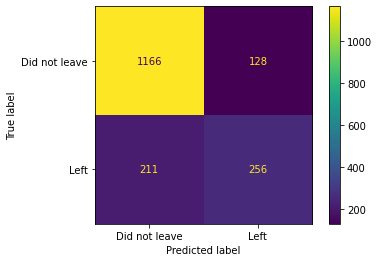

In [38]:
plot_confusion_matrix(clf_xgb, 
                      X_test, 
                      y_test,
                      values_format='d',
                      display_labels=["Did not leave", "Left"])

Z macierzy pomyłek widać, że spośród 1294 osób, które nie odeszły z firmy, 1166 (90%) zostało poprawnie sklasyfikowanych. Z kolei spośród 467 osób, które odeszły z firmy, poprawnie sklasyfikowano 256 (54%). Model XGBoost nie był więc rewelacyjny. Częścią problemu jest to, że nasze dane są niezrównoważone, co widzieliśmy już wcześniej i co widać na macierzy pomyłek, gdzie górny rząd pokazuje 1262 osoby, które nie odeszły, a dolny rząd pokazuje 467 osób, które odeszły. Ponieważ odejścia osób kosztują firmę dużo pieniędzy, chcielibyśmy wychwycić więcej osób, które odeszły. Dobrą wiadomością jest to, że XGBoost ma parametr 'scale_pos_weight', który pomaga w przypadku niezrównoważonych danych. Spróbujmy więc poprawić przewidywania za pomocą walidacji krzyżowej, aby zoptymalizować parametry.

### Optymalizacja parametrów za pomocą walidacji krzyżowej i funkcji GridSearch() 

XGBoost ma wiele hiperparametrów, czyli parametrów, które musimy skonfigurować ręcznie, a które nie są określane przez sam XGBoost, w tym max_depth - maksymalna głębokość drzewa, learning_rate - współczynnik uczenia, gamma - parametr zachęcający do przycinania oraz reg_lambda - parametr regularności lambda. Spróbujmy zatem znaleźć optymalne wartości dla tych hiperparametrów w nadziei, że uda nam się poprawić dokładność na zbiorze testowym.

UWAGA: Ponieważ mamy wiele hiperparametrów do zoptymalizowania, użyjemy funkcji GridSearchCV(). Podajemy kilka potencjalnych wartości dla hiperparametrów, a funkcja GridSearchCV() przetestuje dla nas wszystkie możliwe kombinacje parametrów.

Gdy dane są niezrównoważone, w XGBoost powinno się postępować z następującą regułą:
Jeśli zależy Ci tylko na metryce ogólnej wydajności (AUC) Twojego przewidywania:
- Zrównoważ wagi dodatnie i ujemne za pomocą scale_pos_weight
- Użyj AUC do oceny modelu

Wersja 1

In [39]:
param_grid = {
     'max_depth': [3, 4, 5],
     'learning_rate': [0.1, 0.01, 0.05],
     'gamma': [0, 0.25, 1.0],
     'reg_lambda': [0, 1.0, 10.0],
     'scale_pos_weight': [1, 3, 5] # XGBoost zaleca: sum(negative instances) / sum(positive instances)
}
# Parametry: max_depth: 4, learning_rate: 0.1, gamma: 0.25, reg_lambda: 10, scale_pos_weight: 3
# Ponieważ learning_rate i reg_lambda były na końcach swoich zakresów, będziemy dalej badać te wartości

Wersja 2

In [40]:
param_grid = {
     'max_depth': [4],
     'learning_rate': [0.1, 0.5, 1],
     'gamma': [0.25],
     'reg_lambda': [10.0, 20, 100],
      'scale_pos_weight': [3]
}
# Parametry: max_depth: 4, learning_rate: 0.1, reg_lambda: 10

Aby przyspieszyć walidację krzyżową i dodatkowo zapobiec overfittingowi (przepełnieniu), używamy tylko losowego podzbioru danych (90%) i ponadto używamy tylko losowego podzbioru cech (kolumn) (50%) dla każdego drzewa.

In [41]:
optimal_params = GridSearchCV(
     estimator=xgb.XGBClassifier(objective='binary:logistic', 
                                 eval_metric="logloss", # by nie uzyskać 'warning'
                                 seed=42,
                                 subsample=0.9,
                                 colsample_bytree=0.5,
                                 use_label_encoder=False),
     param_grid=param_grid,
     scoring='roc_auc', # wyznaczamy wartość AUC
     verbose=0, 
     n_jobs = 10,
     cv = 3
)

In [42]:
optimal_params.fit(X_train, 
                    y_train, 
                    early_stopping_rounds=10,                
                    eval_metric='auc',
                    eval_set=[(X_test, y_test)],
                    verbose=False)
print(optimal_params.best_params_)

Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 10.0, 'scale_pos_weight': 3}


Tak więc po przetestowaniu wszystkich możliwych kombinacji potencjalnych wartości parametrów za pomocą walidacji krzyżowej widzimy, że powinniśmy ustawić: gamma=0,25, learning_rate=0,1, max_depth=4, reg_lambda=10 i scale_pos_weight=3.

### Budowanie interpretacja i ocena zoptymalizowanego modelu XGBoost 

Teraz, gdy mamy już optymalne wartości parametrów, możemy zbudować ostateczny model XGBoost:

In [43]:
clf_xgb = xgb.XGBClassifier(seed=42,
                        objective='binary:logistic',
                        eval_metric="logloss", ## this avoids warning...
                        gamma=0.25,
                        learning_rate=0.1,
                        max_depth=4,
                        reg_lambda=10,
                        scale_pos_weight=3,
                        subsample=0.9,
                        colsample_bytree=0.5,
                        use_label_encoder=False)
clf_xgb.fit(X_train, 
            y_train, 
            verbose=True, 
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.56622
[1]	validation_0-aucpr:0.59525
[2]	validation_0-aucpr:0.62515
[3]	validation_0-aucpr:0.62633
[4]	validation_0-aucpr:0.63192
[5]	validation_0-aucpr:0.63171
[6]	validation_0-aucpr:0.62947
[7]	validation_0-aucpr:0.63056
[8]	validation_0-aucpr:0.63608
[9]	validation_0-aucpr:0.63616
[10]	validation_0-aucpr:0.63627
[11]	validation_0-aucpr:0.65626
[12]	validation_0-aucpr:0.65366
[13]	validation_0-aucpr:0.65374
[14]	validation_0-aucpr:0.65623
[15]	validation_0-aucpr:0.64859
[16]	validation_0-aucpr:0.64615
[17]	validation_0-aucpr:0.64529
[18]	validation_0-aucpr:0.64527
[19]	validation_0-aucpr:0.65224
[20]	validation_0-aucpr:0.64951
[21]	validation_0-aucpr:0.65017


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eval_metric='logloss', gamma=0.25,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=10,
              scale_pos_weight=3, seed=42, subsample=0.9, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, ...)

Teraz narysujmy kolejną macierz pomyłek, aby sprawdzić, czy zoptymalizowany model XGBoost radzi sobie lepiej.

Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


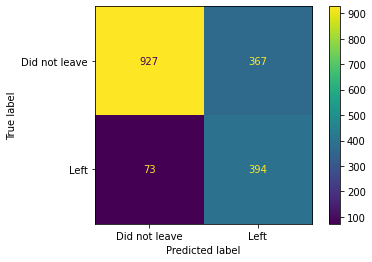

In [44]:
plot_confusion_matrix(clf_xgb, 
                      X_test, 
                      y_test,
                      values_format='d',
                      display_labels=["Did not leave", "Left"])

Widzimy, że zoptymalizowany model XGBoost znacznie lepiej radzi sobie z identyfikacją osób, które odeszły z firmy. Spośród 467 osób, które opuściły firmę, 390 (84%) zostało poprawnie zidentyfikowanych. Przed optymalizacją poprawnie zidentyfikowaliśmy tylko 256 osób (54%). Jednak poprawa ta nastąpiła kosztem tego, że nie byliśmy w stanie poprawnie zaklasyfikować tak wielu osób, które nie odeszły z firmy. Przed optymalizacją poprawnie zidentyfikowaliśmy 1166 (90%) osób, które nie wyjechały. Obecnie poprawnie klasyfikujemy tylko 937 osób (72%). Ten kompromis może być jednak lepszy dla firmy, ponieważ teraz może ona skoncentrować zasoby na osobach, które odchodzą, jeśli pomoże to w ich zatrzymaniu.

## Przykład 2 

Wczytanie bibliotek:

In [45]:
import numpy as np
import pandas as pd
import xgboost as xgb 
 
from sklearn.metrics import roc_auc_score, accuracy_score # wczytanie metryk sukcesu
from sklearn.model_selection import train_test_split
 
pd.options.display.max_columns = 250

Abyśmy mogli zobaczyć jak działa gradient boosting, skorzystamy z danych z Kaggle z konkursu Santander. Są one już na tyle oczyszczone, że nie ma potrzeby robić żadnej obróbki. Zatem będą idealne do szybkiej implementacji gradient boosting’u. Pobierzemy jedynie zbiór train.csv, który podzielimy na zbiór do budowy modelu oraz dwa walidacyjne.

Wczytujemy dane oraz możemy się im przyjrzeć.

In [46]:
df = pd.read_csv('dane2.csv')
print(df.shape)
df.head()

(200000, 202)


ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7   var_8   var_9  var_10   var_11   var_12   var_13  var_14  \
0  18.6266 -4.9200  5.7470  2.9252   3.1821  14.0137   0.5745  8.7989   
1  16.5338  3.1468  8.0851 -0.4032   8.0585  14.0239   8.4135  5.4345   
2  14.6155 -4.9193  5.9525 -0.3249 -11.2648  14.1929   7.3124  7.5244   
3  14.9250 -5.8609  8.2450  2.3061   2.8102  13.8463  11.9704  6.4569   
4  19.2514  6.2654  7.6784 -9.4458 -12.1419  13.8481   7.8895  7.7894   

    var_15   var_16   var_17   var_18   var_19   var_20   var_21   var_22  \
0  14.5691   5.7487  -7.2393   4.2840  30.7133  10.5350  16.2191   2.5791   
1  13.7003  13.8275 -15.5849   7.8000  28.5708   3.4287   2.7407   8.5524   
2  14.6472   7.6782  -1.7395   4.7011  20.4775  17.7559  18.1377   1.2145   
3  14.8372  10.7430  -0.4299  15.9426  13.7257  20.3010  12.5579   6.8202   
4  15.0553   8.4871  -3.0680   6.5263  11.3152  21.4246  18.9608  10.1102   

   var_23   var_24   var_25   var_26  var_27  var_28  var_29   var_30  \
0  2.4716  14.3831  13.4325  -5.1488 -0.4073  4.9306  5.9965  -0.3085   
1  3.3716   6.9779  13.8910 -11.7684 -2.5586  5.0464  0.5481  -9.2987   
2  3.5137   5.6777  13.2177  -7.9940 -2.9029  5.8463  6.1439 -11.1025   
3  2.7229  12.1354  13.7367   0.8135 -0.9059  5.9070  2.8407 -15.2398   
4  2.7142  14.2080  13.5433   3.1736 -3.3423  5.9015  7.9352  -3.1582   

    var_31  var_32   var_33   var_34   var_35  var_36  var_37   var_38  \
0  12.9041 -3.8766  16.8911  11.1920  10.5785  0.6764  7.8871   4.6667   
1   7.8755  1.2859  19.3710  11.3702   0.7399  2.7995  5.8434  10.8160   
2  12.4858 -2.2871  19.0422  11.0449   4.1087  4.6974  6.9346  10.8917   
3  10.4407 -2.5731   6.1796  10.6093  -5.9158  8.1723  2.8521   9.1738   
4   9.4668 -0.0083  19.3239  12.4057   0.6329  2.7922  5.8184  19.3038   

   var_39   var_40   var_41   var_42   var_43   var_44   var_45   var_46  \
0  3.8743  -5.2387   7.3746  11.5767  12.0446  11.6418  -7.0170   5.9226   
1  3.6783 -11.1147   1.8730   9.8775  11.7842   1.2444 -47.3797   7.3718   
2  0.9003 -13.5174   2.2439  11.5283  12.0406   4.1006  -7.9078  11.1405   
3  0.6665  -3.8294  -1.0370  11.7770  11.2834   8.0485 -24.6840  12.7404   
4  1.4450  -5.5963  14.0685  11.9171  11.5111   6.9087 -65.4863  13.8657   

    var_47   var_48   var_49   var_50   var_51  var_52  var_53  var_54  \
0 -14.2136  16.0283   5.3253  12.9194  29.0460 -0.6940  5.1736 -0.7474   
1   0.1948  34.4014  25.7037  11.8343  13.2256 -4.1083  6.6885 -8.0946   
2  -5.7864  20.7477   6.8874  12.9143  19.5856  0.7268  6.4059  9.3124   
3 -35.1659   0.7613   8.3838  12.6832   9.5503  1.7895  5.2091  8.0913   
4   0.0444  -0.1346  14.4268  13.3273  10.4857 -1.4367  5.7555 -8.5414   

    var_55   var_56  var_57  var_58   var_59   var_60   var_61  var_62  \
0  14.8322  11.2668  5.3822  2.0183  10.1166  16.1828   4.9590  2.0771   
1  18.5995  19.3219  7.0118  1.9210   8.8682   8.0109  -7.2417  1.7944   
2   6.2846  15.6372  5.8200  1.1000   9.1854  12.5963 -10.3734  0.8748   
3  12.3972  14.4698  6.5850  3.3164   9.4638  15.7820 -25.0222  3.4418   
4  14.1482  16.9840  6.1812  1.9548   9.2048   8.6591 -27.7439 -0.4952   

   var_63  var_64  var_65  var_66   var_67  var_68  var_69   var_70  var_71  \
0 -0.2154  8.6748  9.5319  5.8056  22.4321  5.0109 -4.7010  21.6374  0.5663   
1 -1.3147  8.1042  1.5365  5.4007   7.9344  5.0220  2.2302  40.5632  0.5134   
2  5.8042  3.7163 -1.1016  7.3667   9.8565  5.0228 -5.7828   2.3612  0.8520   
3 -4.3923  8.6464  6.3072  5.6221  23.6143  5.0220 -3.9989   4.0462

Możemy sobie przygotować funkcje pomocnicze, które pomogą przygotować wczytanie danych do odpowiednich zborów:

In [47]:
def get_feats(df): # dzięki temu nie będzie trzeba brać niepotrzebnych kolumn do modelowania
    feats = [f for f in df.columns if f not in ['ID_code','target']]
    return feats
 
def get_X(df): # funkcja służąca do pobierania macierzy X, czyli cech które, będziemy starać się opisywać modelem
    return df[ get_feats(df) ].values
 
def get_y(df, target_var='target'): # wektor y - informacja o predycji. w przypadku przykładowych danych to ":target"
    return df[target_var].values

Warto jeszcze sprawdzić przykładowe metryki jak zadziałał nasz model. Zróbmy to na podstawie metryk AUC oraz GINI:

In [48]:
def create_measures(y,y_pred): 
    score_test = roc_auc_score(y, y_pred) # score_test odpowiada za AUC
    Gini_index = 2*score_test - 1
         
    d = {'AUC': [round(score_test,4)], 'GINI': [round(Gini_index,4)]}
    d = pd.DataFrame.from_dict(d)
     
    return d
 
def calculating_metrics(X_train, X_val, X_oot, y_train, y_val, y_oot):
    #prawdopodobieństwa:
    y_pred_test = model.predict_proba(X_train)[:, 1]
    y_pred_test_val = model.predict_proba(X_val)[:, 1]
    y_pred_test_oot = model.predict_proba(X_oot)[:, 1]
 
    test = create_measures(y_train,y_pred_test)
    val = create_measures(y_val,y_pred_test_val)
    oot = create_measures(y_oot,y_pred_test_oot) 
 
    measures =  pd.concat([test,val,oot])
    measures.set_index([pd.Index(['TRAIN', 'VAL', 'OOT'])]) 
    return measures

Dokonujemy podziału zbioru wejściowego - podział zbioru do nauki modelu, testowy i walidacyjny:

In [49]:
X, y = get_X(df), get_y(df) 
# Chcemy mieć dwa niezależne zbiory walidacyjne. Przydadzą się do robienia optymalizacji hiperparametrów
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2019)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=2019)
 
print('TRAIN:',X_train.shape, y_train.shape)
print('TEST:',X_test.shape, y_test.shape)
print('VALIDATION:',X_val.shape, y_val.shape)

TRAIN: (120000, 200) (120000,)
TEST: (40000, 200) (40000,)
VALIDATION: (40000, 200) (40000,)


Uwaga - przypomnienie:
* Grupa ucząca – to taki zestaw danych, który używamy do nauki algorytmu. Na podstawie tych danych model uczy się odpowiednio klasyfikować, buduje wszelkie zależności.
* Grupa walidacyjna jest to taki zbiór danych, którego używamy do przeprowadzenia nieobciążonego testu modelu, który przeszkoliliśmy na danych treningowych (uczących). Test ten przeprowadzamy podczas wyboru modelu albo dobierając zestaw hiperparametrów. 
* Grupa testowa – kiedy już wybraliśmy model, wybraliśmy hiperparametry, to nadchodzi czas na przetestowanie wszystkiego danymi z grupy testowej. 

i budujemy model na parametrach domyślnych:

In [50]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)  
measures = calculating_metrics(X_train, X_test, X_val, y_train, y_test, y_val)
measures

Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:42:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


AUC    GINI
0  0.9894  0.9787
0  0.8528  0.7057
0  0.8555  0.7109

Uwaga: W tabelach tych mamy kolejno wartości dla zbioru: treningowy i dwa walidacyjne.

Uwaga: Współczynnik AUC zawsze ma wartość z przedziału od 0 do 1, przy czym wyższe wartości reprezentują lepszy klasyfikator.

Można pobawić się różnymi parametrami i sprawdzić jak wpływają na moc modelu. Poniżej przykład, jak wystarczy odrobinę zmodyfikować parametry by uzyskać na próbkach walidacyjnych znaczną poprawę o ponad 2 punkty procentowe wg metryki GINI.

In [51]:
model = xgb.XGBClassifier(max_depth = 5, n_estimators=150, subsample = 0.75)
model.fit(X_train, y_train)  
measures = calculating_metrics(X_train, X_test, X_val, y_train, y_test, y_val)
measures

Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:46:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


AUC    GINI
0  0.9772  0.9544
0  0.8638  0.7277
0  0.8668  0.7335

Chcąc zastosować inną implementacje np. LightGBM, wystarczy wczytać pakiet lightgbm oraz podmienić model:

In [52]:
import lightgbm as lgb
 
model = lgb.LGBMClassifier(max_depth = 5, n_estimators = 150, subsample=0.75)
model.fit(X_train, y_train)  
measures = calculating_metrics(X_train, X_test, X_val, y_train, y_test, y_val)
measures

AUC    GINI
0  0.9517  0.9035
0  0.8631  0.7261
0  0.8654  0.7307

Zobaczmy od razu na powyższym przykładzie, że różnica w mocy na podobnych parametrach to zaledwie 0.0019.

Wniosek jest więc taki, że różnica między XGB oraz LightGBM jest nieznaczna.

## Przykład 3 

Tematyka - modele predykcyjne
      
Zbiór danych : Default of Credit Card Clients.

Ten zbiór danych zawiera informacje o zaległościach w płatnościach, czynnikach demograficznych, danych kredytowych, historii płatności oraz wyciągach z rachunków klientów kart kredytowych na Tajwanie w okresie od kwietnia 2005 r. do września 2005 r.

Agenda:
1. wstęp
2. ładowanie pakietów
3. wczytanie danych
4. sprawdzenie danych 
* wstępne spojrzenie na dane  
* sprawdzenie braków danych
* sprawdzenie, czy dane są zbalansowane
5. eksploracja danych
6. modele predykcyjne 
* Lasy losowe
* XGBoost  
* LightGBM  
7. wnioski

### Wstęp 

W zbiorze znajduje się 25 zmiennych:

ID: ID każdego klienta

LIMIT_BAL: Kwota przyznanego kredytu w dolarach NT (obejmuje kredyt indywidualny i rodzinny/uzupełniający)

SEX: Płeć (1=male (mężczyzna), 2=female (kobieta))

EDUCATION: (1=szkoła wyższa, 2=uniwersytet, 3=szkoła średnia, 4=inne, 5=nieznane, 6=nieznane)

MARRIAGE: Stan cywilny (1=małżeństwo, 2=samotna, 3=inne)

AGE: wiek w latach

PAY_0: Status spłaty we wrześniu 2005 r. (-1=spłata należyta, 1=opóźnienie w spłacie o jeden miesiąc, 2=opóźnienie w spłacie o dwa miesiące, ...., 8=opóźnienie w spłacie za osiem miesięcy, 9=opóźnienie w spłacie za dziewięć miesięcy i więcej)

PAY_2: Stan spłat w sierpniu 2005 r. (skala taka sama jak powyżej)

PAY_3: Stan spłat w lipcu 2005 r. (skala taka sama jak powyżej)

PAY_4: Stan spłat w czerwcu 2005 r. (skala taka sama jak powyżej)

PAY_5: Stan spłat w maju 2005 r. (skala taka sama jak powyżej)

PAY_6: Stan spłat w kwietniu 2005 r. (skala taka sama jak powyżej)

BILL_AMT1: Kwota wyciągu z rachunku za wrzesień 2005 r. (w dolarach NT)

BILL_AMT2: Kwota wyciągu z rachunku za sierpień 2005 r. (w dolarach NT)

BILL_AMT3: Kwota wyciągu z rachunku za lipiec 2005 r. (w dolarach NT)

BILL_AMT4: Kwota wyciągu z rachunku za czerwiec 2005 r. (w dolarach NT)

BILL_AMT5: Kwota wyciągu z rachunku za maj 2005 r. (w dolarach NT)

BILL_AMT6: Kwota wyciągu z rachunku za kwiecień 2005 r. (w dolarach NT)

PAY_AMT1: Kwota poprzedniej płatności z września 2005 r. (w dolarach NT)

PAY_AMT2: Kwota poprzedniej płatności z sierpnia 2005 r. (w dolarach NT)

PAY_AMT3: Kwota poprzedniej płatności z lipca 2005 r. (w dolarach NT)

PAY_AMT4: Kwota poprzedniej płatności z czerwca 2005 r. (w dolarach NT)

PAY_AMT5: Kwota poprzedniej płatności z maja 2005 r. (w dolarach NT)

PAY_AMT6: Kwota poprzedniej płatności z kwietnia 2005 r. (w dolarach NT)

default.payment.next.month: Płatność za opóźnienie (1=tak, 0=nie)

### Ładowanie pakietów 

Ładowanie pakietów

In [53]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb

pd.set_option('display.max_columns', 100)

Ustawienie parametrów - w tym miejscu ustawiamy kilka parametrów dla analizy i modeli

In [54]:
RFC_METRIC = 'gini'  # metryka użyta dla RandomForrestClassifier
NUM_ESTIMATORS = 100 # ilość estymatorów użyta do RandomForrestClassifier
NO_JOBS = 4 # liczba parallel jobs użyta do RandomForrestClassifier

#VALIDATION
VALID_SIZE = 0.20 # prosta walidacja przy użyciu train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 # liczba KFolds dla walidacji krzyżowej

RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iteracje
EARLY_STOP = 50 #lgb wczesne zatrzymanie
OPT_ROUNDS = 1000  # należy dostosować na podstawie najlepszych rund walidacji.
VERBOSE_EVAL = 50  # pokazuje wynik metryki

IS_LOCAL = False

### Wczytanie i sprawdzenie danych 

##### Wstępne spojrzenie na dane 

In [55]:
data_df = pd.read_csv('dane3.csv')
print(data_df.shape)
data_df.head()

(30000, 25)


ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2     3913.0     3102.0      689.0        0.0        0.0   
1      0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2      0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3      0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4      0      0     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0        0.0       0.0     689.0       0.0       0.0       0.0       0.0   
1     3261.0       0.0    1000.0    1000.0    1000.0       0.0    2000.0   
2    15549.0    1518.0    1500.0    1000.0    1000.0    1000.0    5000.0   
3    29547.0    2000.0    2019.0    1200.0    1100.0    1069.0    1000.0   
4    19131.0    2000.0   36681.0   10000.0    9000.0     689.0     679.0   

   default.payment.next.month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0

Przyjrzyjmy się bardziej szczegółom danych.

In [56]:
data_df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_5         PAY_6      BILL_AMT1      BILL_AMT2     BILL_AMT3  \
count  30000.000000  30000.000000   30000.000000   30000.000000  3.000000e+04   
mean      -0.266200     -0.291100   51223.330900   49179.075167  4.701315e+04   
std        1.133187      1.149988   73635.860576   71173.768783  6.934939e+04   
min       -2.000000     -2.000000 -165580.000000  -69777.000000 -1.572640e+05   
25%       -1.000000     -1.000000    3558.750000    2984.750000  2.666250e+03   
50%        0.000000      0.000000   22381.500000   21200.000000  2.008850e+04   
75%        0.000000      0.000000   67091.000000   64006.250000  6.016475e+04   
max        8.000000      8.000000  964511.000000  983931.000000  1.664089e+06   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count   30000.000000   30000.000000   30000.000000   30000.000000   
mean    43262.948967   40311.400967   38871.760400    5663.580500   
std     64332.856134   60797.155770   59554.107537   16563.280354   
min   -170000.000000  -81334.000000 -339603.000000       0.000000   
25%      2326.750000    1763.000000    1256.000000    1000.000000   
50%     19052.000000   18104.500000   17071.000000    2100.000000   
75%     54506.000000   50190.500000   49198.250000    5006.000000   
max    891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000

Istnieje 30 000 różnych klientów kart kredytowych.

Średnia wartość dla kwoty limitu karty kredytowej wynosi 167 484. Odchylenie standardowe jest ogromne, a maksymalna wartość wynosi 1M.

Poziom wykształcenia to głównie szkoła średnia i uniwersytet.

Większość klientów to osoby pozostające w związku małżeńskim lub samotnie wychowujące dzieci (rzadziej w innym stanie).

Średnia wieku wynosi 35,5 roku, a odchylenie standardowe 9,2.

Ponieważ wartość 0 dla zaległości w spłacie oznacza "brak zaległości", a wartość 1 oznacza "zaległość", średnia 0,221 oznacza, że 22,1% umów o kartę kredytową będzie zalegać z płatnościami w przyszłym miesiącu (zostanie to zweryfikowane w kolejnych częściach analizy).

##### Sprawdzenie braków danych 

Sprawdźmy, czy występują jakieś braki danych.

In [57]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

ID  BILL_AMT2  PAY_AMT6  PAY_AMT5  PAY_AMT4  PAY_AMT3  PAY_AMT2  \
Total    0.0        0.0       0.0       0.0       0.0       0.0       0.0   
Percent  0.0        0.0       0.0       0.0       0.0       0.0       0.0   

         PAY_AMT1  BILL_AMT6  BILL_AMT5  BILL_AMT4  BILL_AMT3  BILL_AMT1  \
Total         0.0        0.0        0.0        0.0        0.0        0.0   
Percent       0.0        0.0        0.0        0.0        0.0        0.0   

         LIMIT_BAL  PAY_6  PAY_5  PAY_4  PAY_3  PAY_2  PAY_0  AGE  MARRIAGE  \
Total          0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0       0.0   
Percent        0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0       0.0   

         EDUCATION  SEX  default.payment.next.month  
Total          0.0  0.0                         0.0  
Percent        0.0  0.0                         0.0

Wniosek: W całym zbiorze danych nie ma brakujących danych.

##### Sprawdzenie, czy dane są zbalansowane

Sprawdźmy, czy dane są niezbalansowane w odniesieniu do wartości docelowej, tj. default.payment.next.month.

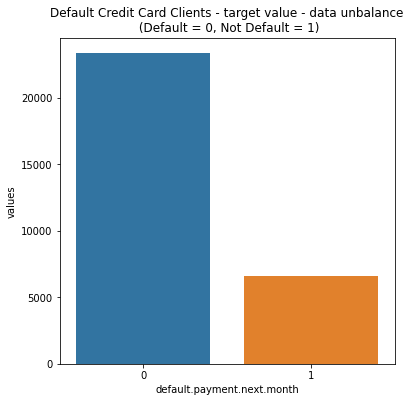

In [58]:
temp = data_df["default.payment.next.month"].value_counts()
df = pd.DataFrame({'default.payment.next.month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

Z 30 000 klientów (czyli 22%) 6 636 będzie zalegać z płatnościami w następnym miesiącu. Dane nie wykazują dużej nierównowagi w stosunku do wartości docelowej (default.payment.next.month).

### Eksploracja danych 

##### Kwota limitu kredytowego 

Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


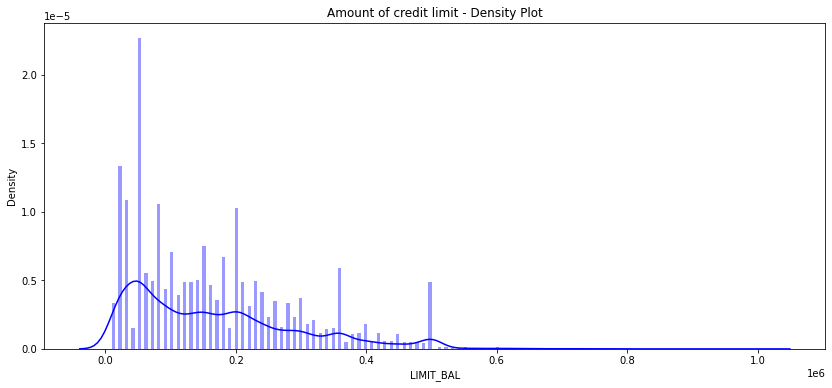

In [59]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(data_df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

Największa grupa kwot limitu kredytowego jest mniej więcej na kwotę 50 tys. Sprawdźmy to.

In [60]:
data_df['LIMIT_BAL'].value_counts().shape

(81,)

Istnieje 81 różnych wartości dla kwoty limitu kredytowego.

In [61]:
data_df['LIMIT_BAL'].value_counts().head(5)

50000.0     3365
20000.0     1976
30000.0     1610
80000.0     1567
200000.0    1528
Name: LIMIT_BAL, dtype: int64

Najwięcej jest kart kredytowych z limitem 50 000 (3365), następnie z limitem 20 000 (1976) i 30 000 (1610).

##### Kwota limitu kredytowego pogrupowana według zaległości płatniczych w następnym miesiącu 

Zwizualizujmy wykres gęstości dla kwoty limitu kredytowego (LIMIT_BAL), pogrupowanej według domyślnej płatności w następnym miesiącu.

Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


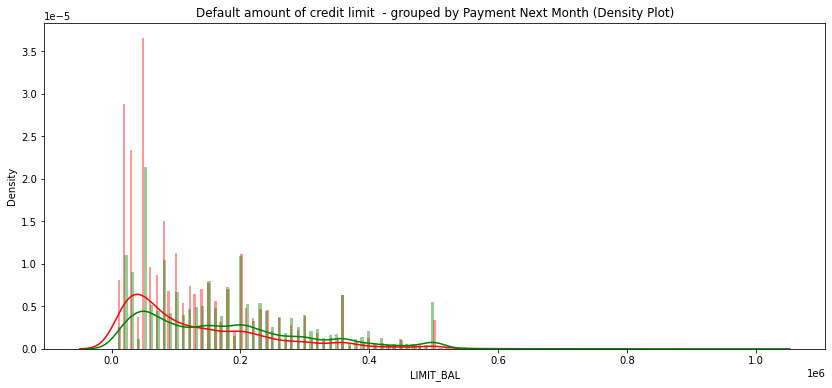

In [62]:
class_0 = data_df.loc[data_df['default.payment.next.month'] == 0]["LIMIT_BAL"]
class_1 = data_df.loc[data_df['default.payment.next.month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

Większość przypadków niewykonania zobowiązania dotyczy limitów kredytowych 0-100 000. Większa liczba przypadków niewykonania zobowiązania dotyczy kwot 50 000, 20 000 i 30 000.

##### Limit kredytowy a płeć 

Sprawdźmy, jak rozkładają się limity kredytowe w zależności od płci. W przypadku płci 1 oznacza mężczyznę, a 2 - kobietę.

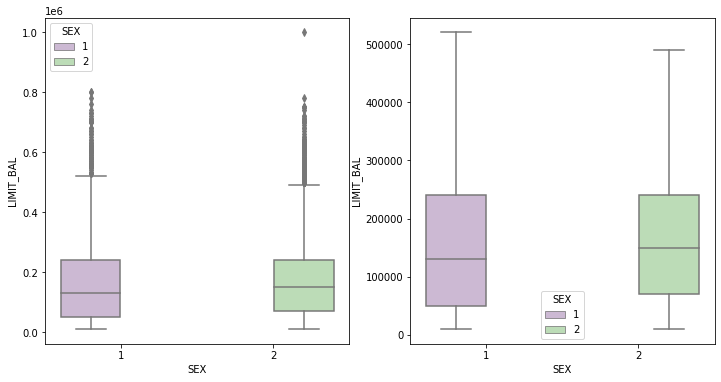

In [63]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=data_df, palette="PRGn",showfliers=False)
plt.show();

Limit kredytowy jest dość zrównoważony między płciami. Mężczyźni mają nieco mniejszy Q2, a większy Q3 i Q4 oraz niższą średnią. Kobiety mają większą skrajną wartość maksymalną (1 mln NT dolarów).

##### Korelacja cech 

W przypadku wartości liczbowych przedstawmy korelację cech.

Sprawdźmy korelację dla kwoty z wyciągu z rachunku za okres kwiecień - wrzesień 2005 r.

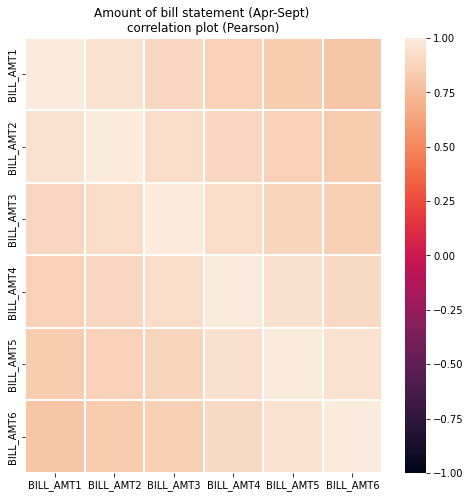

In [64]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = data_df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

Korelacja maleje wraz z odległością między miesiącami. Najniższe korelacje występują między wrześniem a kwietniem.

Sprawdźmy korelację dla kwoty poprzedniej płatności w okresie kwiecień - wrzesień 2005.

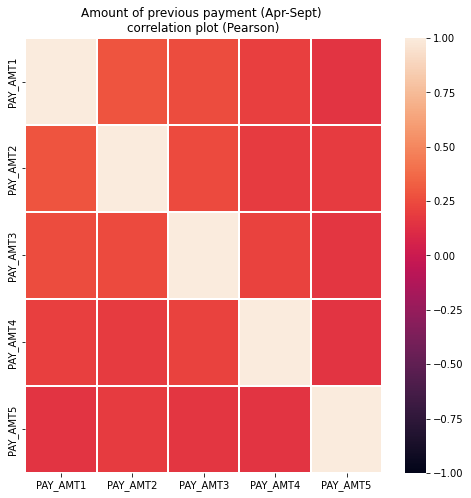

In [65]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (8,8))
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot (Pearson)')
corr = data_df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

Nie ma korelacji między kwotami poprzednich płatności za okres kwiecień-wrzesień 2005 r.

Sprawdźmy korelację między statusem spłaty w okresie kwiecień - wrzesień 2005 r.

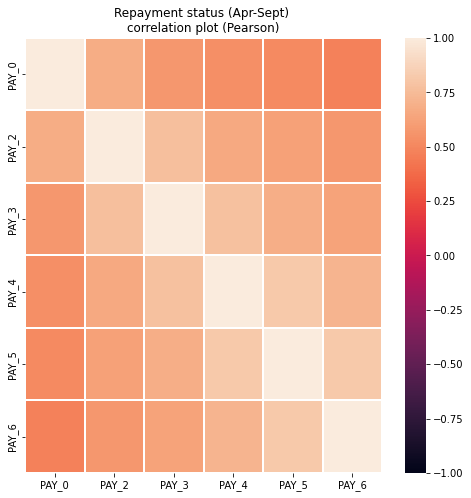

In [66]:
var = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (8,8))
plt.title('Repayment status (Apr-Sept) \ncorrelation plot (Pearson)')
corr = data_df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

Korelacja maleje wraz z odległością między miesiącami. Najniższe korelacje występują w okresie wrzesień-kwiecień.

##### Płeć, wykształcenie, wiek i małżeństwo

Pokażmy rozkłady płci, wykształcenia, wieku i małżeństwa.

Zaczniemy od przedstawienia wykresów typu boxplot z rozkładem wieku pogrupowanym według stanu cywilnego i płci.

Status małżeński oznacza:

0 : nieznany (uznajmy go za inny)
1 : żonaty
2 : kawaler
3 : inne

Status płci to:

1 : mężczyzna
2 : kobieta

In [67]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=data_df, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

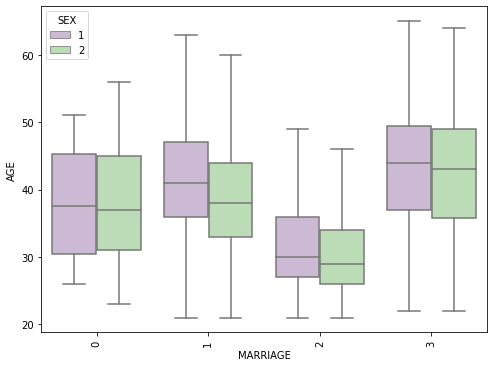

In [68]:
boxplot_variation('MARRIAGE','AGE', 'SEX',8)

Wygląda na to, że stan cywilny 3 (inni), ze średnimi wartościami powyżej 40 lat i wartościami Q4 powyżej 60 lat oznacza w większości śluby lub rozwody, podczas gdy stan cywilny 0 może oznaczać, że nie jest określony lub rozwiedziony, ponieważ wartości Q1 są powyżej wartości dla żonatych obu płci.

Mężczyźni żonaci mają średnią wieku wyższą od żonatych kobiet. Mężczyźni stanu wolnego również mają średnią wieku wyższą od kobiet stanu wolnego, ale bliższą. Wartości Q3 i Q4 dla żonatych mężczyzn są wyższe od odpowiednich wartości dla żonatych kobiet.

Pokażmy wykresy typu boxplot z rozkładem wieku pogrupowanym według wykształcenia i małżeństwa.

Znaczenie statusu wykształcenia jest następujące:

1 : szkoła wyższa
2 : uniwersytet
3 : szkoła średnia
4 : inne
5 : nieznane
6 : nie wiem

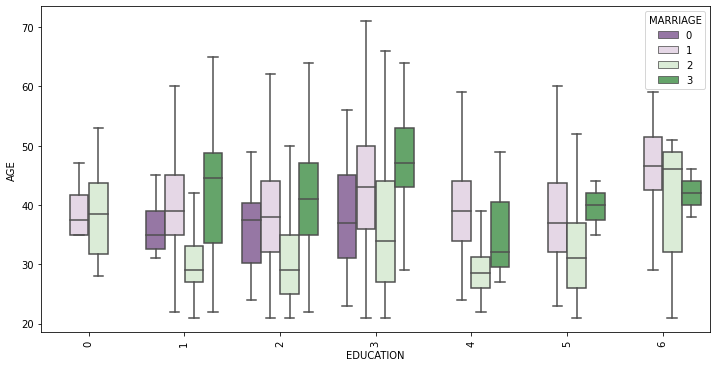

In [69]:
boxplot_variation('EDUCATION','AGE', 'MARRIAGE',12)

##### Wiek, płeć i limit kwoty kredytu 

Pokażmy wykresy typu boxplot z rozkładem limitu kwoty kredytu pogrupowanym według wieku i płci.

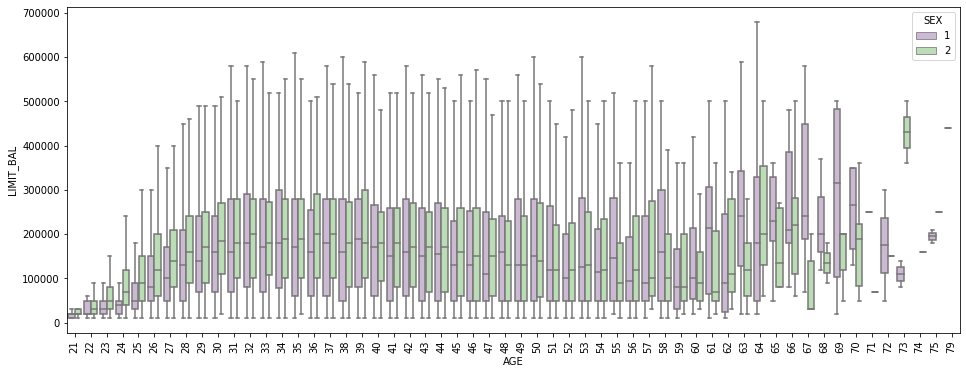

In [70]:
boxplot_variation('AGE','LIMIT_BAL', 'SEX',16)

Wartości średnie, Q3 i Q4 wzrastają u mężczyzn i kobiet wraz z wiekiem do około 35 roku życia, a następnie ulegają wahaniom i osiągają maksimum Q4 dla mężczyzn w wieku 64 lat.

Wartości średnie są na ogół mniejsze u mężczyzn niż u kobiet, z kilkoma wyjątkami, na przykład w wieku 39, 48 i około 60 lat, kiedy to wartości średnie dla mężczyzn są na ogół większe niż dla kobiet.

##### Stan cywilny, poziom wykształcenia i limit kwoty kredytu 

Pokażmy wykresy pudełkowe z rozkładem limitu kwoty kredytu pogrupowanym według stanu cywilnego i poziomu wykształcenia.

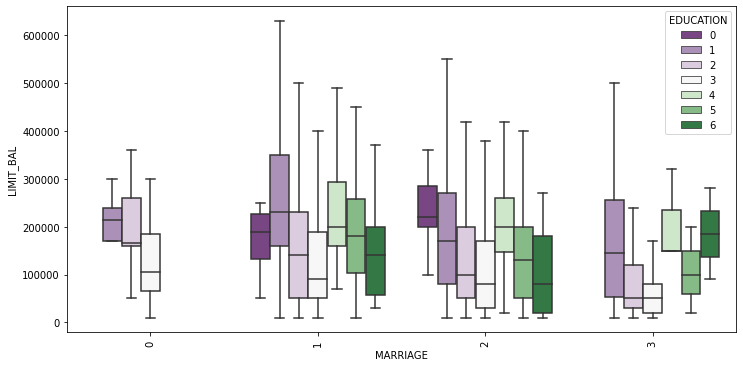

In [71]:
boxplot_variation('MARRIAGE','LIMIT_BAL', 'EDUCATION',12)

### Modele predykcyjne 

##### Definiowanie predyktorów i zmiennej celu 

Zdefiniujmy predyktory i zmienną celu. Definiuje się również cechy kategoryczne, jeśli takie istnieją. W naszym przypadku nie ma cech kategorycznych.

In [72]:
target = 'default.payment.next.month'
predictors = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

##### Podział danych na zbiór treningowy i walidacyjny 

Zdefiniujmy zbiory: trenujący i walidacyjny.

In [73]:
train_df, val_df = train_test_split(data_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

Wykonujemy również kopie train_df i val_df do późniejszego wykorzystania.

In [74]:
train_df_bkp = train_df.copy()
val_df_bkp = val_df.copy()

Zacznijmy od modelu RandomForrestClassifier.

##### Lasy losowe 

Utworzymy model, używając zbioru treningowego do trenowania, a następnie użyjemy zbioru walidacyjnego do walidacji.

Metryki

Jako kryterium walidacji zastosujemy GINI, którego wzór to: GINI = 2 * (AUC) - 1, gdzie wskaźnik AUC (Receiver Operating Characteristic) to obszar pod krzywą ROC. Liczbę estymatorów ustalono na 100, a parallel jobs na 4.

Rozpoczynamy od inicjalizacji klasyfikatora RandomForestClassifier.

Uwaga - przypomnienie:

Krzywa ROC odzwierciedla relacje pomiędzy wartościami FPR (czyli False Positive Rate), a TPR (czyli True Positive Rate). Obszar znajdujący się pod krzywą ROC nazywany jest błędem AUC i jest to miara wydajności klasyfikatora dla wszystkich wartości progowych. Metryka ta przyjmuje wartości z zakresu od 0 do 1, gdzie wartożsci bliższe 1 oznacza, że krzywa ROC zbliża się ku lewemu górnemu narożnikowi wykresu. Wartość tą interpretujemy, że dal wysokiej wartości AUC model oceni wyżej losowy pozytywny przypadek, niż losowy negatywny dla klasyfikacji w danej klasie.

In [75]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

Przetrenujmy klasyfikator RandonForestClassifier, używając danych train_df i funkcji fit.

In [76]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

Predykujmy teraz wartości docelowe dla danych val_df, używając funkcji predict.

In [77]:
preds = clf.predict(val_df[predictors])

Zwizualizujmy także ważność cech.

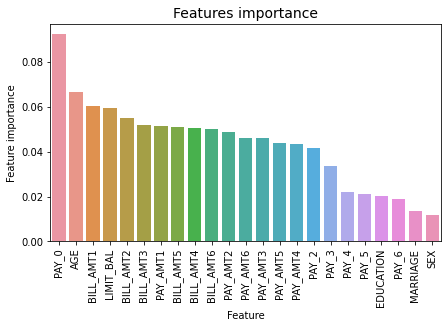

In [78]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

Widzimy, że najistotniejszymi zmiennymi są: PAY_0, AGE, BILL_AMT1, LIMIT_BAL, BILL_AMT2, BILL_AMT3.

Macierz pomyłek

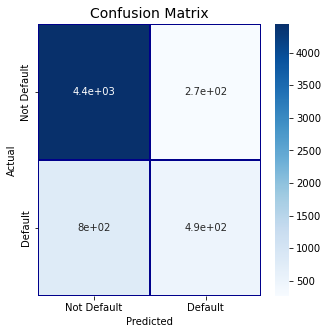

In [79]:
cm = pd.crosstab(val_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Obliczamy również pole powierzchni pod krzywą ROC, a więc AUC.

In [80]:
roc_auc_score(val_df[target].values, preds)

0.6625018741566295

Wartość AUC wynosi około 0.66.

##### XGBoost 

XGBoost jest gradientowym algorytmem wzmacniającym, przygotujmy model.

Przygotowywanie modelu

Inicjalizujemy obiekty DMatrix na potrzeby trenowania i walidacji, zaczynając od zbiorów danych. Ustawiamy także niektóre parametry używane do dostrajania modelu.

In [81]:
# Przygotowanie zbiorów: treningowego i walidacyjnego:
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(val_df[predictors], val_df[target].values)

# Lista do obserwacji złożona z 'train' oraz 'valid'
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Ustawienie parametrów Xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Trenowanie modelu

In [82]:
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[19:54:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.69220	valid-auc:0.69740
[50]	train-auc:0.76847	valid-auc:0.76489
[100]	train-auc:0.77728	valid-auc:0.77289
[150]	train-auc:0.78281	valid-auc:0.77645
[200]	train-auc:0.78679	valid-auc:0.77880
[250]	train-auc:0.78992	valid-auc:0.77987
[300]	train-auc:0.79232	valid-auc:0.78022
[350]	train-auc:0.79439	valid-auc:0.78148
[400]	train-auc:0.79613	valid-auc:0.78195
[450]	train-auc:0.79780	valid-auc:0.78217
[500]	train-auc:0.79956	valid-auc:0.78271
[550]	train-auc:0.80120	valid-auc:0.78270
[568]	train-auc:0.80170	valid-auc:0.78271


Najlepszy wynik walidacyjny AUC wynosi 0.78.

Wykres istotności zmiennych

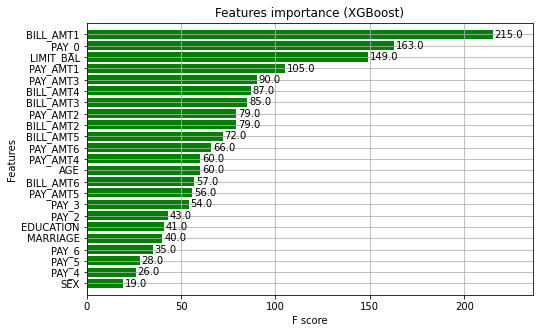

In [83]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

##### LightGBM 

LightGBM to kolejny algorytm gradient boostingowy.

Definiowanie parametrów modelu - określmy je

In [84]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':50, # because training data is sightly unbalanced 
         }

Przygotowywanie modelu

Zdefiniujmy cechy kategoryczne.

In [85]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

Przygotujmy model, tworząc zbiory: treningowy i walidacyjny.

Zainicjalizujemy również Datasets listą cech kategorycznych (lgb ma specjalne traktowanie wartości kategorycznych).

In [86]:
dtrain = lgb.Dataset(train_df[predictors].values, 
                     label=train_df[target].values,
                     feature_name=predictors,
                     categorical_feature=categorical_features)

dvalid = lgb.Dataset(val_df[predictors].values,
                     label=val_df[target].values,
                     feature_name=predictors,
                     categorical_feature=categorical_features)

Uruchamiamy model, używając funkcji train

In [87]:
evals_results = {}

model = lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain, dvalid], 
                  valid_names=['train','valid'], 
                  evals_result=evals_results, 
                  num_boost_round=MAX_ROUNDS,
                  early_stopping_rounds=EARLY_STOP,
                  verbose_eval=VERBOSE_EVAL, 
                  feval=None)

del dvalid
gc.collect()

Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\lightgbm\engine

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001678 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.778238	valid's auc: 0.771173
[100]	train's auc: 0.789346	valid's auc: 0.782605
[150]	train's auc: 0.794861	valid's auc: 0.784753
Early stopping, best iteration is:
[135]	train's auc: 0.793452	valid's auc: 0.785154


13510

Najlepszy wynik walidacji uzyskano dla iteracji 135, dla której AUC ~= 0,79.

Wykres istotności zmiennych

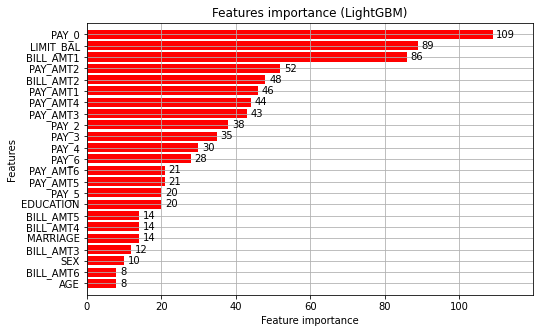

In [88]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lgb.plot_importance(model, height=0.8, title="Features importance (LightGBM)", ax=ax,color="red") 
plt.show()

Trenowanie i walidacja z użyciem kroswalidacji

Użyjemy walidacji krzyżowej (KFolds) z 5 foldami. Dane są podzielone na 5 foldów i  trenujemy z wykorzystaniem 4 foldów (n-1), a walidujemy z wykorzystaniem piątego (n-tego) foldu.

In [89]:
kf = KFold(n_splits = NUMBER_KFOLDS, random_state = RANDOM_STATE, shuffle = True)
for train_index, test_index in kf.split(data_df):
    train_X, valid_X = data_df.iloc[train_index], data_df.iloc[test_index]

    dtrain = lgb.Dataset(train_X[predictors].values, label=train_X[target].values,
                     feature_name=predictors)

    dvalid = lgb.Dataset(valid_X[predictors].values, label=valid_X[target].values,
                     feature_name=predictors)

    evals_results = {}
    model =  lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain, dvalid], 
                  valid_names=['train','valid'], 
                  evals_result=evals_results, 
                  num_boost_round=MAX_ROUNDS,
                  early_stopping_rounds=EARLY_STOP,
                  verbose_eval=VERBOSE_EVAL, 
                  feval=None)

Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _lo

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001636 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.779233	valid's auc: 0.773431
[100]	train's auc: 0.78851	valid's auc: 0.781476
[150]	train's auc: 0.794224	valid's auc: 0.784248
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[200]	train's auc: 0.79907	valid's auc: 0.78515
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[250]	train's auc: 0.803179	valid's auc: 0.785179
Early stopping, best iteration is:
[235]	train's auc: 0.80184	valid's auc: 0.78536
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001607 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 50 r

Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _lo

[100]	train's auc: 0.789975	valid's auc: 0.772436
[150]	train's auc: 0.796011	valid's auc: 0.775725
[200]	train's auc: 0.801429	valid's auc: 0.77646
[250]	train's auc: 0.806222	valid's auc: 0.777403
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[300]	train's auc: 0.810405	valid's auc: 0.777709
Early stopping, best iteration is:
[285]	train's auc: 0.809127	valid's auc: 0.777946


Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _lo

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001560 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.777731	valid's auc: 0.78199
[100]	train's auc: 0.787021	valid's auc: 0.788144
[150]	train's auc: 0.793398	valid's auc: 0.789845
[200]	train's auc: 0.798342	valid's auc: 0.789827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[250]	train's auc: 0.802923	valid's auc: 0.789641
Early stopping, best iteration is:
[202]	train's auc: 0.798522	valid's auc: 0.789932


Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _lo

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001580 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.778307	valid's auc: 0.772279
[100]	train's auc: 0.789215	valid's auc: 0.780146
[150]	train's auc: 0.795824	valid's auc: 0.782062
[200]	train's auc: 0.800611	valid's auc: 0.781847
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[182]	train's auc: 0.798955	valid's auc: 0.782449
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001775 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 50 rounds


Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _lo

[50]	train's auc: 0.778941	valid's auc: 0.773321
[100]	train's auc: 0.788555	valid's auc: 0.780365
[150]	train's auc: 0.795057	valid's auc: 0.78276
[200]	train's auc: 0.7996	valid's auc: 0.783983
[250]	train's auc: 0.804012	valid's auc: 0.784121
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[300]	train's auc: 0.807877	valid's auc: 0.78461
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[350]	train's auc: 0.811747	valid's auc: 0.784532
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[321]	train's auc: 0.809658	valid's auc: 0.78483


Średnia wartość AUC walidacji dla 5 uzyskanych foldów wyniosła 0.78, przy czym wartości te mieściły się w przedziale od 0.778 do 0.79.

##### Wnioski 

Zbadaliśmy dane, sprawdzając, czy nie są one niezbalansowane, wizualizując cechy i rozumiejąc zależności między różnymi cechami.

Następnie zbadaliśmy trzy modele predykcyjne:

* Lasy losowe
* XGBoost  
* LightGBM 

* Zaczęliśmy od RandomForrestClassifier, dla którego uzyskaliśmy współczynnik AUC równy 0,66. 

* Następnie eksperymentowaliśmy z modelem XGBoost, dla którego uzyskany wynik AUC wyniósł 0,78.

* Następnie dane zostały poddane działaniu modelu LightGBM. Do oceny skuteczności modelu w przewidywaniu wartości docelowej, tj. wykrywaniu, czy klient karty kredytowej będzie zalegał z płatnościami w następnym miesiącu, zastosowaliśmy zarówno metodę train-validation split, jak i cross-validation. W przypadku obu metod dla modelu LightGBM uzyskane wartości AUC dla zbioru walidacyjnego wyniosły również około 0.78.

* Dwa ostatnie wnioski potwierdzają, że wyniki z Xgboost są zwykle bardzo zbliżone do wyników z LightGBM.

## Przykład 4 

Zbiór pochodzi z UCI Machine Learning Repository, chcemy przewidzieć, czy pacjent ma chorobę serca, czy nie.

In [90]:
import pandas as pd
import numpy as np
import xgboost as xgb 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 

In [91]:
df = pd.read_csv('dane4.cleveland.data', 
                 header=None)

In [92]:
df.head()

0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0

Widzimy, że zamiast nazw kolumn mamy po prostu ich numery. Ponieważ nazwy kolumn ułatwiłyby orientację w sposobie formatowania danych, zastąpmy numery kolumn następującymi nazwami kolumn:
- **age**,
- **sex**,
- **cp**, chest pain - ból w klatce piersiowej
- **restbp**, resting blood pressure (in mm Hg)
- **chol**, serum cholesterol in mg/dl
- **fbs**, fasting blood sugar - cukier we krwi na czczo
- **restecg**, resting electrocardiographic results
- **thalach**,  maximum heart rate achieved
- **exang**, exercise induced angina
- **oldpeak**, ST depression induced by exercise relative to rest
- **slope**, the slope of the peak exercise ST segment
- **ca**, number of major vessels (0-3) colored by fluoroscopy
- **thal**, this is short of thalium heart scan
- **hd**, diagnosis of heart disease, the predicted attribute

In [93]:
df.columns = ['age', 
              'sex', 
              'cp', 
              'restbp', 
              'chol', 
              'fbs', 
              'restecg', 
              'thalach', 
              'exang', 
              'oldpeak', 
              'slope', 
              'ca', 
              'thal', 
              'hd']
df.head()

age  sex   cp  restbp   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0   145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0   160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0   120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0   130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0   130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  hd  
0    3.0  0.0  6.0   0  
1    2.0  3.0  3.0   2  
2    2.0  2.0  7.0   1  
3    3.0  0.0  3.0   0  
4    1.0  0.0  3.0   0

Identyfikacja i usuwanie brakujących danych

In [94]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [95]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

Widzimy, że ca zawiera liczby (0,0, 3,0, 2,0 i 1,0) oraz znaki zapytania (?). Liczby reprezentują liczbę naczyń krwionośnych, które zostały oświetlone podczas fluoroskopii, a znaki zapytania oznaczają brakujące dane.

In [96]:
df['thal'].unique() # podobna sytuacja jak w ca

array(['6.0', '3.0', '7.0', '?'], dtype=object)

XGBoost określa domyślne zachowanie dla brakujących danych. Musimy więc tylko zidentyfikować brakujące wartości i upewnić się, że są one ustawione na 0.

Zanim jednak to zrobimy, sprawdźmy, w ilu wierszach brakuje danych. Jeśli jest ich dużo, możemy mieć do czynienia z problemem, z którym XGBoost nie jest w stanie sobie poradzić. Jeśli nie jest ich zbyt wiele, możemy po prostu ustawić ich wartość na 0.

In [97]:
len(df.loc[(df['ca'] == '?') 
           | 
           (df['thal'] == '?')])

6

In [98]:
df.loc[(df['ca'] == '?') 
       | 
       (df['thal'] == '?')]

age  sex   cp  restbp   chol  fbs  restecg  thalach  exang  oldpeak  \
87   53.0  0.0  3.0   128.0  216.0  0.0      2.0    115.0    0.0      0.0   
166  52.0  1.0  3.0   138.0  223.0  0.0      0.0    169.0    0.0      0.0   
192  43.0  1.0  4.0   132.0  247.0  1.0      2.0    143.0    1.0      0.1   
266  52.0  1.0  4.0   128.0  204.0  1.0      0.0    156.0    1.0      1.0   
287  58.0  1.0  2.0   125.0  220.0  0.0      0.0    144.0    0.0      0.4   
302  38.0  1.0  3.0   138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  hd  
87     1.0  0.0    ?   0  
166    1.0    ?  3.0   0  
192    2.0    ?  7.0   1  
266    2.0  0.0    ?   2  
287    2.0    ?  7.0   0  
302    1.0    ?  3.0   0

In [99]:
len(df) # ilość obserwacji w df

303

Zatem 6 z 303 wierszy, czyli 2%, zawiera brakujące wartości. Ustawmy więc brakujące wartości, ?, na 0.

In [100]:
df.loc[(df['ca'] == '?'), 'ca'] = 0
df.loc[(df['thal'] == '?'), 'thal'] = 0

Dzielenie danych na zmienne: zależne i niezależne

In [101]:
X = df.drop('hd', axis=1).copy() # X zawiera dane, które chcemy wykorzystać do przewidywania
X.head()

age  sex   cp  restbp   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0   145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0   160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0   120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0   130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0   130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  
0    3.0  0.0  6.0  
1    2.0  3.0  3.0  
2    2.0  2.0  7.0  
3    3.0  0.0  3.0  
4    1.0  0.0  3.0

In [102]:
y = df['hd'].copy() # y zawiera daną, które chcemy przewidywać
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

One-Hot Encoding

Poniższa lista informuje nas, co reprezentuje każda zmienna i jaki typ danych (zmiennoprzecinkowe lub kategoryczne) powinna zawierać:
- **age**, **Float**
- **sex** - **Category**
  - 0 = female
  - 1 = male
- **cp**, chest pain, **Category**
  - 1 = typical angina
  - 2 = atypical angina
  - 3 = non-anginal pain
  - 4 = asymptomatic
- **restbp**, resting blood pressure (in mm Hg), **Float**
- **chol**, serum cholesterol in mg/dl, **Float**
- **fbs**, fasting blood sugar, **Category**
  - 0 = >=120 mg/dl
  - 1 = <120 mg/dl
- **restecg**, resting electrocardiographic results, **Category**
  - 1 = normal
  - 2 = having ST-T wave abnormality
  - 3 = showing probable or definite left ventricular hypertrophy
- **thalach**,  maximum heart rate achieved, **Float**
- **exang**, exercise induced angina, **Category**
  - 0 = no
  - 1 = yes
- **oldpeak**, ST depression induced by exercise relative to rest. **Float**
- **slope**, the slope of the peak exercise ST segment, **Category**
  - 1 = upsloping
  - 2 = flat
  - 3 = downsloping
- **ca**, number of major vessels (0-3) colored by fluoroscopy, **Float**
- **thal**, thalium heart scan, **Category**
  - 3 = normal (no cold spots)
  - 6 = fixed defect (cold spots during rest and exercise)
  - 7 = reversible defect (when cold spots only appear during exercise)

In [103]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

Widzimy więc, że wiek, restbp, chol i thalach mają wartości float64, tak jak być powinno, ponieważ chcemy, aby były to liczby zmiennoprzecinkowe. Wszystkie pozostałe kolumny wymagają jednak sprawdzenia, czy zawierają tylko rozsądne wartości, a niektóre z nich muszą zostać zmienione. Dzieje się tak dlatego, że podczas gdy XGBoost obsługuje dane ciągłe, takie jak spoczynkowe ciśnienie krwi (restbp) i maksymalne tętno (thalach), nie obsługuje danych kategorycznych, takich jak ból w klatce piersiowej (cp), który zawiera 4 różne kategorie. Dlatego też, aby móc korzystać z danych kategorycznych w XGBoost, musimy przekształcić kolumnę danych kategorycznych w wiele kolumn wartości binarnych, tzn. zastosować tzw. One-Hot Encoding.

In [104]:
X['cp'].unique() # przekształcimy te wartości na 0 i 1

array([1., 4., 3., 2.])

In [105]:
pd.get_dummies(X, columns=['cp']).head()

age  sex  restbp   chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0  63.0  1.0   145.0  233.0  1.0      2.0    150.0    0.0      2.3    3.0   
1  67.0  1.0   160.0  286.0  0.0      2.0    108.0    1.0      1.5    2.0   
2  67.0  1.0   120.0  229.0  0.0      2.0    129.0    1.0      2.6    2.0   
3  37.0  1.0   130.0  250.0  0.0      0.0    187.0    0.0      3.5    3.0   
4  41.0  0.0   130.0  204.0  0.0      2.0    172.0    0.0      1.4    1.0   

    ca thal  cp_1.0  cp_2.0  cp_3.0  cp_4.0  
0  0.0  6.0       1       0       0       0  
1  3.0  3.0       0       0       0       1  
2  2.0  7.0       0       0       0       1  
3  0.0  3.0       0       0       1       0  
4  0.0  3.0       0       1       0       0

Użyjemy teraz funkcji pd.get_dummies  na czterech kolumnach kategorycznych, które mają więcej niż dwie kategorie i zapiszmy wynik.

In [106]:
X_encoded = pd.get_dummies(X, columns=['cp', 
                                       'restecg', 
                                       'slope', 
                                       'thal'])
X_encoded.head()

age  sex  restbp   chol  fbs  thalach  exang  oldpeak   ca  cp_1.0  \
0  63.0  1.0   145.0  233.0  1.0    150.0    0.0      2.3  0.0       1   
1  67.0  1.0   160.0  286.0  0.0    108.0    1.0      1.5  3.0       0   
2  67.0  1.0   120.0  229.0  0.0    129.0    1.0      2.6  2.0       0   
3  37.0  1.0   130.0  250.0  0.0    187.0    0.0      3.5  0.0       0   
4  41.0  0.0   130.0  204.0  0.0    172.0    0.0      1.4  0.0       0   

   cp_2.0  cp_3.0  cp_4.0  restecg_0.0  restecg_1.0  restecg_2.0  slope_1.0  \
0       0       0       0            0            0            1          0   
1       0       0       1            0            0            1          0   
2       0       0       1            0            0            1          0   
3       0       1       0            1            0            0          0   
4       1       0       0            0            0            1          1   

   slope_2.0  slope_3.0  thal_0  thal_3.0  thal_6.0  thal_7.0  
0          0          1       0         0         1         0  
1          1          0       0         1         0         0  
2          1          0       0         0         0         1  
3          0          1       0         1         0         0  
4          0          0       0         1         0         0

Zanim zbudujemy model XGBoost zauważmy, że y nie zawiera tylko 0 i 1. Zamiast tego zawiera 5 różnych poziomów choroby serca. 0 = brak choroby serca, a 1-4 to różne stopnie choroby serca. Możemy to sprawdzić za pomocą funkcji unique():

In [107]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

Ponieważ tworzymy tylko model XGBoost, który dokonuje prostej klasyfikacji i interesuje nas tylko to, czy ktoś ma chorobę serca, czy nie, musimy zamienić wszystkie liczby > 0 na 1.

In [108]:
y_not_zero_index = y > 0
y[y_not_zero_index] = 1
y.unique()

array([0, 1], dtype=int64)

Konwertowanie wszystkich kolumn na wartości Int, Float lub Bool

In [109]:
X_encoded.dtypes

age            float64
sex            float64
restbp         float64
chol           float64
fbs            float64
thalach        float64
exang          float64
oldpeak        float64
ca              object
cp_1.0           uint8
cp_2.0           uint8
cp_3.0           uint8
cp_4.0           uint8
restecg_0.0      uint8
restecg_1.0      uint8
restecg_2.0      uint8
slope_1.0        uint8
slope_2.0        uint8
slope_3.0        uint8
thal_0           uint8
thal_3.0         uint8
thal_6.0         uint8
thal_7.0         uint8
dtype: object

Widzimy, że musimy przekonwertować kolumnę ca na liczbę zmiennoprzecinkową lub całkowitą. Dokonujemy tego za pomocą funkcji pandas to_numeric().

In [110]:
X_encoded['ca'] = pd.to_numeric(X_encoded['ca'])
X_encoded.dtypes

age            float64
sex            float64
restbp         float64
chol           float64
fbs            float64
thalach        float64
exang          float64
oldpeak        float64
ca             float64
cp_1.0           uint8
cp_2.0           uint8
cp_3.0           uint8
cp_4.0           uint8
restecg_0.0      uint8
restecg_1.0      uint8
restecg_2.0      uint8
slope_1.0        uint8
slope_2.0        uint8
slope_3.0        uint8
thal_0           uint8
thal_3.0         uint8
thal_6.0         uint8
thal_7.0         uint8
dtype: object

Budowa wstępnego modelu XGBoost

Dzielimy dane na zbiór treningowy i testowy i zbudować model.

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            eval_metric="logloss", 
                            seed=42, 
                            use_label_encoder=False) # nie oczekujemy od XGBoost kodowania etykiet, stąd False
clf_xgb.fit(X_train, y_train)

Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

Zbudowaliśmy model XGBoost do klasyfikacji. Zobaczmy, jak działa on na zbiorze danych testowych, uruchamiając zbiór danych testowych w modelu i rysując macierz konfuzji.

Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


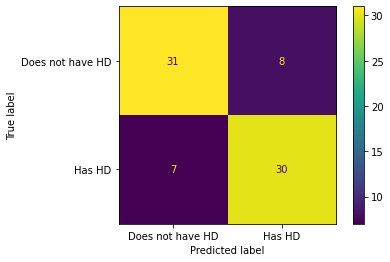

In [112]:
plot_confusion_matrix(clf_xgb, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

W macierzy pomyłek widzimy, że spośród 31 + 8 = 39 osób, które nie miały choroby serca, 31 (79%) zostało poprawnie sklasyfikowanych. Z kolei spośród 7 + 30 = 37 osób z chorobą serca poprawnie sklasyfikowano 30 (81%). Czy można to zrobić lepiej? Tak, choćby przez dostrojenie parametrów. Zoptymalizujmy więc parametry i sprawdźmy, czy uda nam się poprawić klasyfikację.

XGBoost ma wiele hiperparametrów, parametrów, które musimy ręcznie skonfigurować i które nie są określane przez sam XGBoost, w tym n_estimators - liczbę drzew XGBoost do utworzenia, max_depth - maksymalną głębokość drzewa, learning_rate - współczynnik uczenia, gamma - parametr zachęcający do przycinania oraz reg_lambda - parametr regularności lambda. Spróbujmy zatem znaleźć optymalne wartości dla tych hiperparametrów w nadziei, że uda nam się poprawić dokładność na zbiorze testowym.

UWAGA: Ponieważ mamy wiele hiperparametrów do zoptymalizowania, użyjemy funkcji GridSearchCV(). Podajemy kilka potencjalnych wartości dla hiperparametrów, a funkcja GridSearchCV() przetestuje dla nas wszystkie możliwe kombinacje parametrów.

In [113]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'n_estimators': range(50, 250, 50),
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 0.5, 1.0],
    'reg_lambda': [0, 1.0, 10.0, 100.0]
}

optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', eval_metric="logloss", seed=42, use_label_encoder=False),
    param_grid=param_grid,
    verbose=0, 
    n_jobs = 10,
    cv = 5
)

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'reg_lambda': 100.0}


Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Tak więc po przetestowaniu wszystkich możliwych kombinacji potencjalnych wartości parametrów za pomocą walidacji krzyżowej widzimy, że powinniśmy ustawić: gamma=1, learn_rate=0.1, max_depth=3, n_estimators=200 i reg_lambda=100.

Budowa i ocena zoptymalizowanego modelu XGBoost

In [114]:
clf_xgb = xgb.XGBClassifier(seed=42,
                        objective='binary:logistic',
                        eval_metric="logloss", 
                        gamma=1,
                        learning_rate=0.1,
                        max_depth=3,
                        n_estimators=200,
                        reg_lambda=10,
                        use_label_encoder=False)
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

Z:\Users\Patryk\anaconda4\envs\xgboost\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


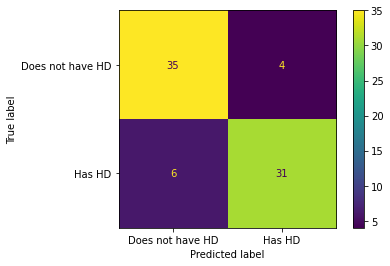

In [115]:
plot_confusion_matrix(clf_xgb, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

Widzimy, że zoptymalizowany model XGBoost jest tylko trochę lepszy w klasyfikowaniu osób, które nie chorują na choroby serca, i trochę gorszy w klasyfikowaniu osób, które na nie chorują. Może być to spowodowane tym, że jest to stosunkowo mały zbiór danych dla XGBoost, który został zaprojektowany dla BIG DATA, czyli danych o ogromnym rozmiarze. 

Spośród 35 + 4 = 39 osób, które nie miały choroby serca, 35 (90%) zostało poprawnie sklasyfikowanych. Stanowi to poprawę w stosunku do modelu wstępnego, który poprawnie sklasyfikował tylko 33 (85%) pacjentów bez choroby serca. Spośród 6 + 31 = 37 osób z chorobami serca poprawnie zaklasyfikowano 31 (85%). Jest to wynik nieco gorszy niż w przypadku modelu wstępnego, w którym poprawnie sklasyfikowano 32 (86%) pacjentów z chorobami serca.

## Bibliografia
1. [https://www.youtube.com/c/joshstarmer/videos](https://www.youtube.com/c/joshstarmer/videos)
2. [https://miroslawmamczur.pl/czym-jest-wzmocnienie-gradientowe-gradient-boosting-i-dlaczego-jest-taki-dobry/](https://miroslawmamczur.pl/czym-jest-wzmocnienie-gradientowe-gradient-boosting-i-dlaczego-jest-taki-dobry/)
3. [https://www.kaggle.com/gpreda/default-of-credit-card-clients-predictive-models/notebook](https://www.kaggle.com/gpreda/default-of-credit-card-clients-predictive-models/notebook)
4. [https://arxiv.org/pdf/1603.02754.pdf](https://arxiv.org/pdf/1603.02754.pdf)
5. [https://www.microsoft.com/en-us/research/wp-content/uploads/2017/11/lightgbm.pdf](https://www.microsoft.com/en-us/research/wp-content/uploads/2017/11/lightgbm.pdf)
6. [https://lightgbm.readthedocs.io/en/latest/](https://lightgbm.readthedocs.io/en/latest/)
7. [https://ichi.pro/pl/przewodnik-po-hiperparametrach-xgboost-149087114445993](https://ichi.pro/pl/przewodnik-po-hiperparametrach-xgboost-149087114445993)
8. [https://ichi.pro/pl/xgboost-kompletny-przewodnik-po-precyzyjnym-dostrojeniu-i-optymalizacji-modelu-39417447888483](https://ichi.pro/pl/xgboost-kompletny-przewodnik-po-precyzyjnym-dostrojeniu-i-optymalizacji-modelu-39417447888483)
9. [https://divideetimpera.net/bagging-i-boosting-czyli-uczenie-zespolowe/](https://divideetimpera.net/bagging-i-boosting-czyli-uczenie-zespolowe/)
10. [http://divideetimpera.net/gradient-boost-czesc-1-regresja/](http://divideetimpera.net/gradient-boost-czesc-1-regresja/)